## House_Price Prediction(Regression with Regularization)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
housepricesdata = pd.read_csv('G:\\My Research\\CSV Files\\housing-prices-dataset\\train.csv')
housepricesdata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
print('No. of Rows:',housepricesdata.shape[0])
print('No. of Columns',housepricesdata.shape[1])

No. of Rows: 1460
No. of Columns 81


In [4]:
# How many columns have missing values
columns_with_missing_values = housepricesdata.columns[housepricesdata.isnull().any()]
housepricesdata[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# column names with missing values
columns_with_missing_values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

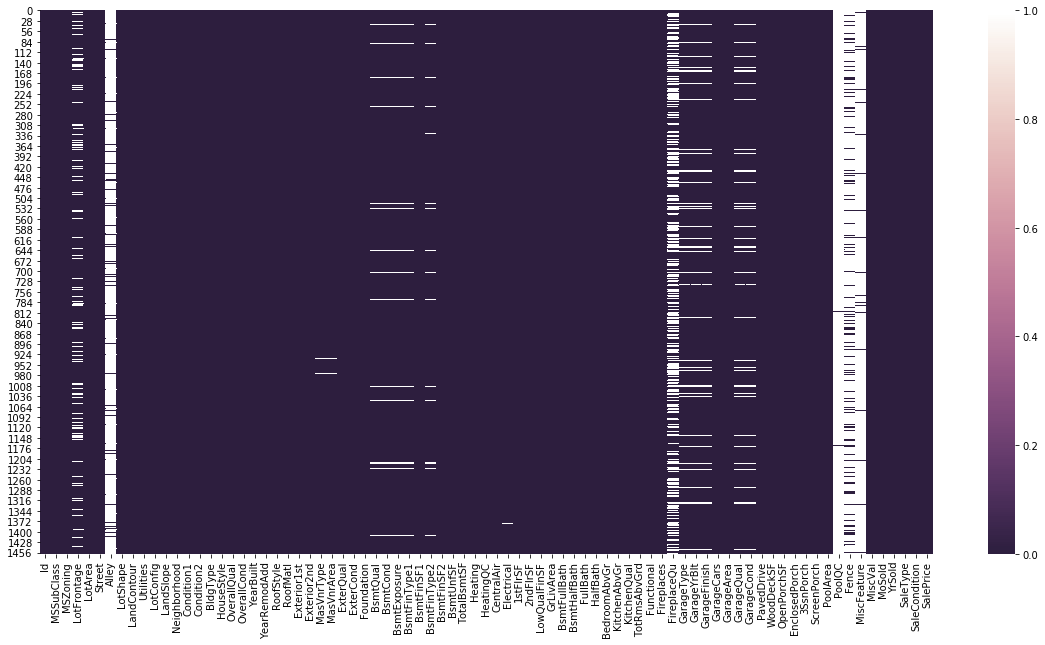

In [7]:
# plotting heatmap to see percentage of null values
# cubehelix palette is a part of seaborn that produces a colormap
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap);

Here, we see that a large amount of data is missing.

But, while reading the description, we come to know that data points are not missing, but it means that particular feature is not present in that house.

Thus, we will replace the null value, as per the given description of the dataset. 

In [8]:
# Replacing missing values with 'No Access' in Alley variable
housepricesdata['Alley'].fillna('No Access', inplace=True)
					
# Filling in the missing values in LotFrontage with its median value
housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)
					
# Replacing all NA values with their original meaning
housepricesdata['BsmtQual'].fillna('No Basement', inplace=True)
housepricesdata['BsmtCond'].fillna('No Basement', inplace=True)
housepricesdata['BsmtExposure'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType1'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType2'].fillna('No Basement', inplace=True)
housepricesdata['GarageYrBlt'].fillna(0, inplace=True)
					
# For observations where GarageType is null, we replace null values in GarageYrBlt=0
housepricesdata['GarageType'].fillna('No Garage', inplace=True)
housepricesdata['GarageFinish'].fillna('No Garage', inplace=True)
housepricesdata['GarageQual'].fillna('No Garage', inplace=True)
housepricesdata['GarageCond'].fillna('No Garage', inplace=True)
housepricesdata['PoolQC'].fillna('No Pool', inplace=True)
housepricesdata['Fence'].fillna('No Fence', inplace=True)
housepricesdata['MiscFeature'].fillna('None', inplace=True)
housepricesdata['FireplaceQu'].fillna('No Fireplace', inplace=True)


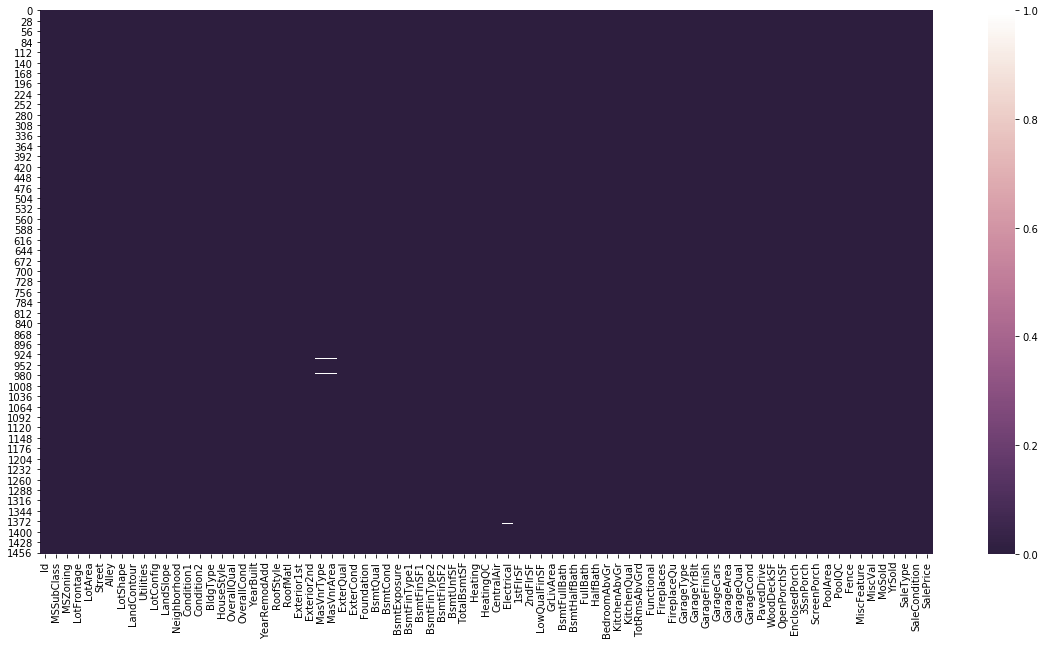

In [9]:
# again plotting heatmap to see percentage of null values
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap);

In [10]:
pd.options.display.max_columns = None #(use to display the full result)
print(pd.crosstab(index=housepricesdata["MasVnrType"],\
columns=housepricesdata["MasVnrArea"], dropna=False, margins=True))

MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  30.0  \
MasVnrType                                                                   
BrkCmn        0    0     0     0     0     0     0     0     0     0     0   
BrkFace       1    0     1     1     6     2     1     0     1     1     2   
None        859    2     0     0     0     0     0     0     0     0     0   
Stone         1    0     0     0     1     0     0     1     0     0     0   
All         861    2     1     1     7     2     1     1     1     1     2   

MasVnrArea  31.0  32.0  34.0  36.0  38.0  40.0  41.0  42.0  44.0  45.0  46.0  \
MasVnrType                                                                     
BrkCmn         0     0     0     0     0     0     1     0     0     0     0   
BrkFace        1     1     1     0     1     4     0     2     3     2     1   
None           0     0     0     0     0     0     0     0     0     0     0   
Stone          0     0     0     1     0     0     0 

In [11]:
# Filling in the missing values for MasVnrType and MasVnrArea with None and 0 respectively
housepricesdata['MasVnrType'].fillna('None', inplace=True)
housepricesdata['MasVnrArea'].fillna(0, inplace=True)

In [12]:
print(pd.crosstab(index=housepricesdata["MasVnrType"],\
columns=housepricesdata["MasVnrArea"], dropna=False, margins=True))

MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  30.0  \
MasVnrType                                                                   
BrkCmn        0    0     0     0     0     0     0     0     0     0     0   
BrkFace       1    0     1     1     6     2     1     0     1     1     2   
None        867    2     0     0     0     0     0     0     0     0     0   
Stone         1    0     0     0     1     0     0     1     0     0     0   
All         869    2     1     1     7     2     1     1     1     1     2   

MasVnrArea  31.0  32.0  34.0  36.0  38.0  40.0  41.0  42.0  44.0  45.0  46.0  \
MasVnrType                                                                     
BrkCmn         0     0     0     0     0     0     1     0     0     0     0   
BrkFace        1     1     1     0     1     4     0     2     3     2     1   
None           0     0     0     0     0     0     0     0     0     0     0   
Stone          0     0     0     1     0     0     0 

In [13]:
housepricesdata['MSSubClass'][housepricesdata['Electrical'].isnull()]

1379    80
Name: MSSubClass, dtype: int64

In [14]:
# Using crosstab to generate the count of Electrical Type by MSSubClass
pd.options.display.max_columns = None
print(pd.crosstab(index=housepricesdata["Electrical"],\
columns=housepricesdata['MSSubClass'], dropna=False, margins=True))

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1460  


In [15]:
housepricesdata['Electrical'].fillna('SBrkr', inplace=True)

In [16]:
# Again, checking for the null values
housepricesdata.isna().sum().sum()

0

As, there are no null values now, we can proceed further with our data.

In [17]:
# changing the datatype to object
housepricesdata['OverallQual'] = housepricesdata['OverallQual'].astype(object)
housepricesdata['OverallCond'] = housepricesdata['OverallCond'].astype(object)
housepricesdata['MSSubClass'] = housepricesdata['MSSubClass'].astype(object)

In [18]:
# dropping the ID column
housepricesdata = housepricesdata.drop('Id',1)

In [19]:
# creating datafrane of numerical columns
num_df = housepricesdata.select_dtypes(exclude=['object'])

In [20]:
num_df.shape # 34 numerical column

(1460, 34)

In [21]:
num_df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
# creating datafrane of cateorical columns
cat_df = housepricesdata.select_dtypes('object')

In [23]:
cat_df.shape #46 categorical column

(1460, 46)

In [24]:
cat_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### EDA

Now, we will see the relationship between the target variable, i.e.'SalePrice' and numerical independent variables

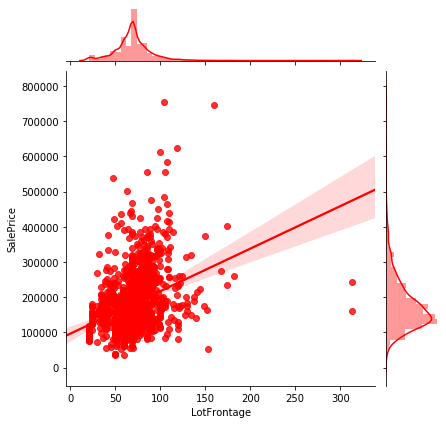

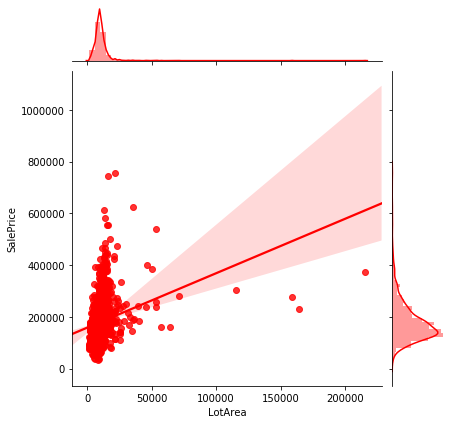

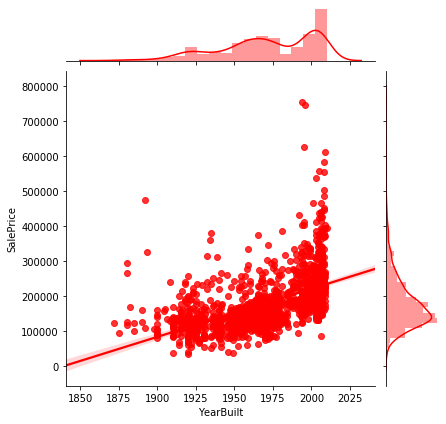

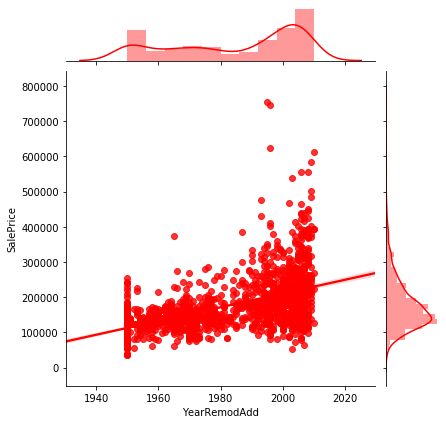

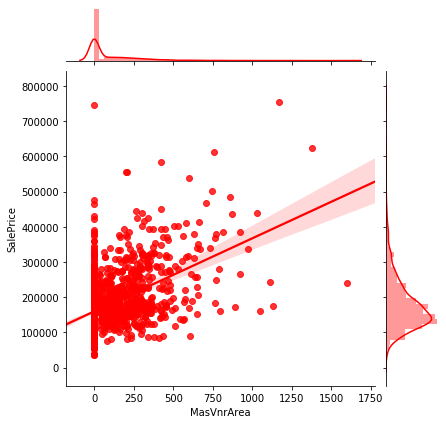

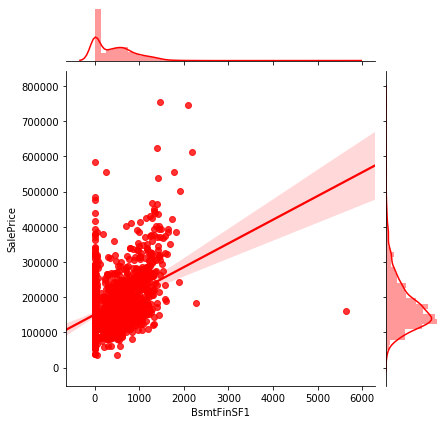

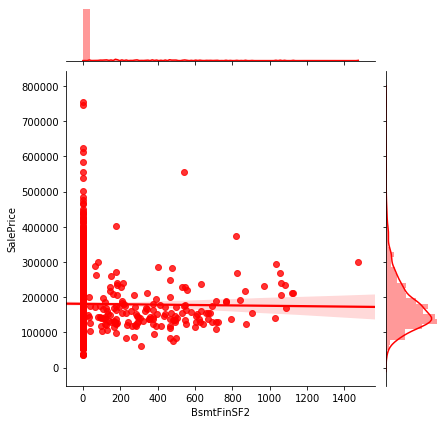

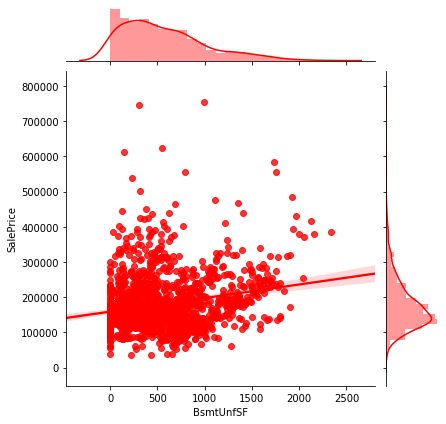

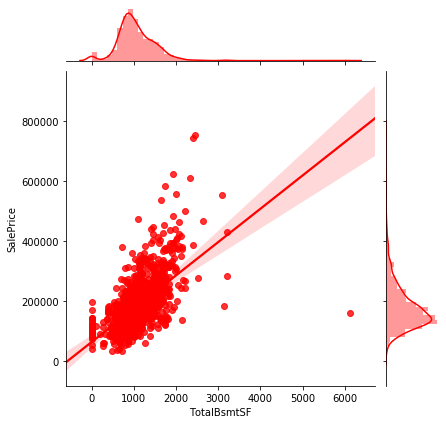

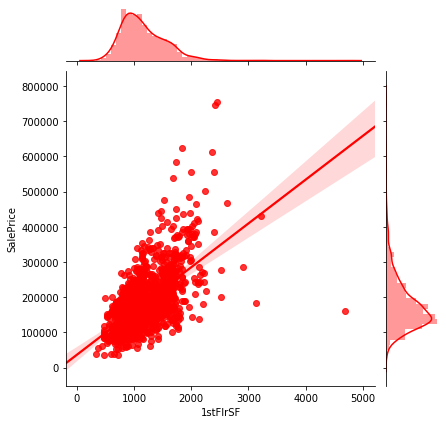

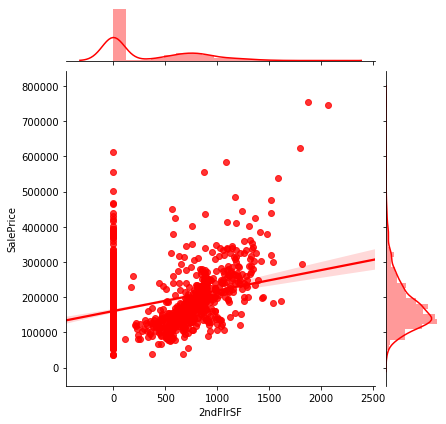

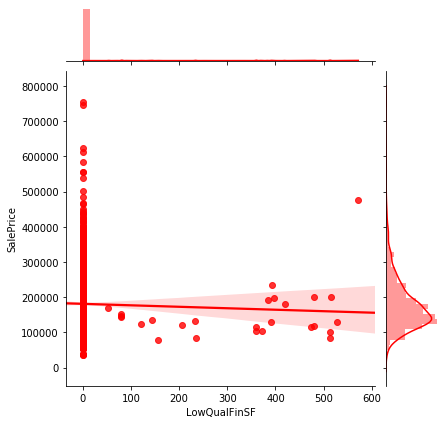

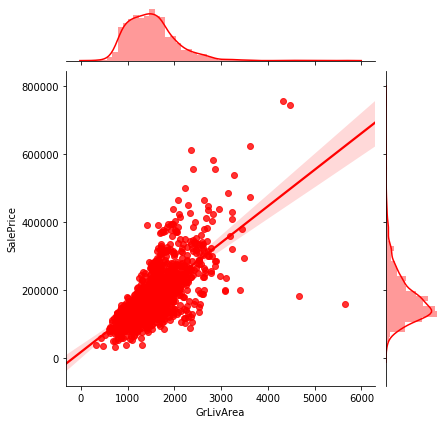

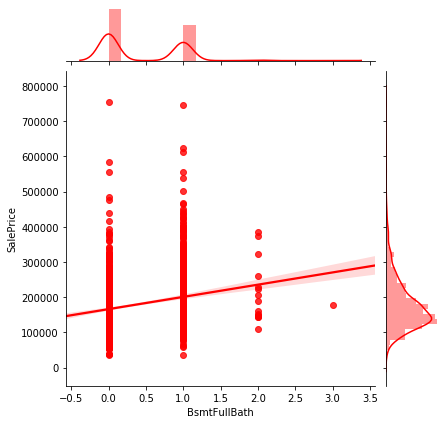

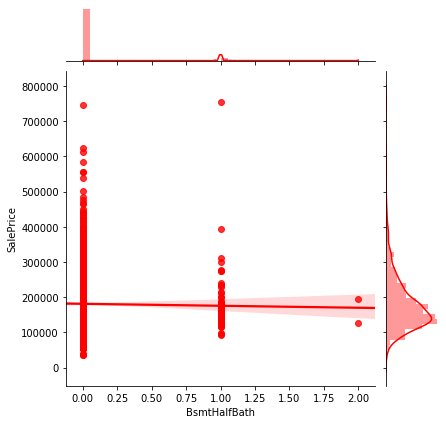

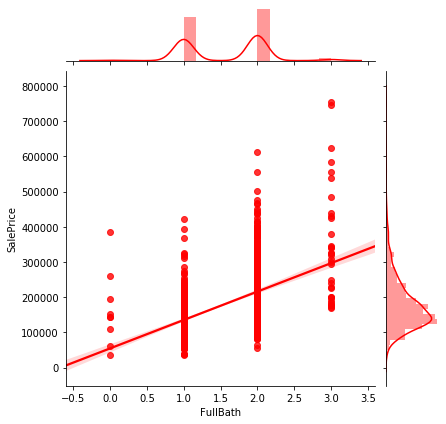

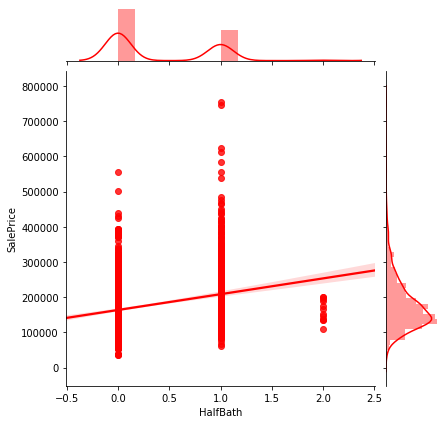

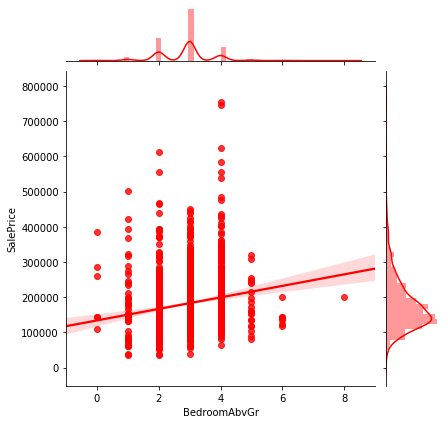

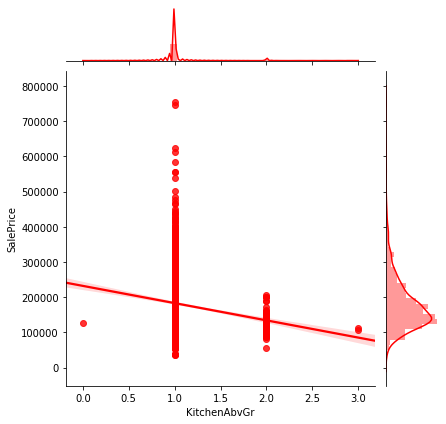

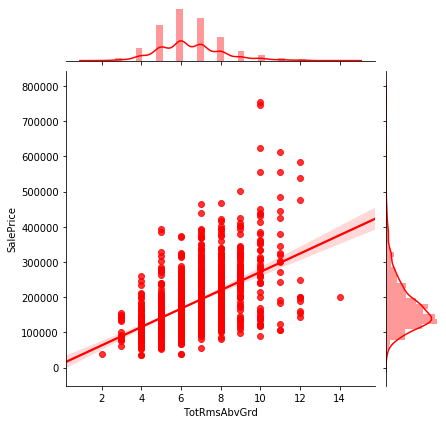

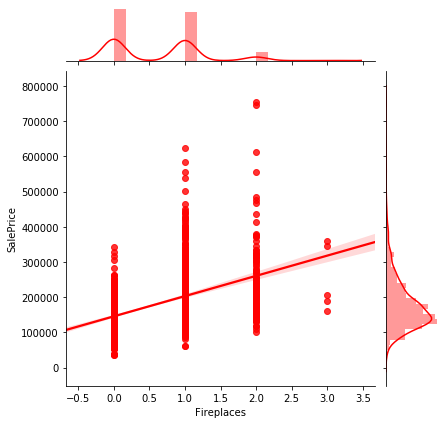

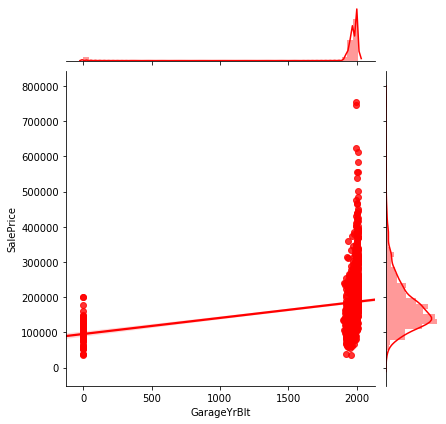

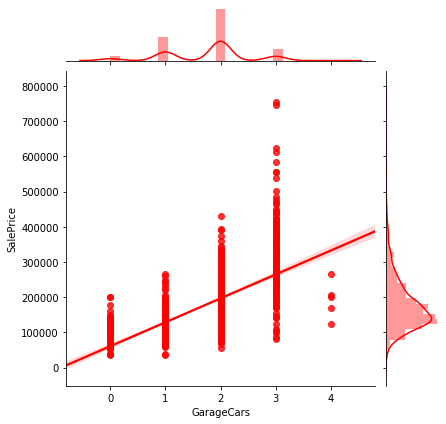

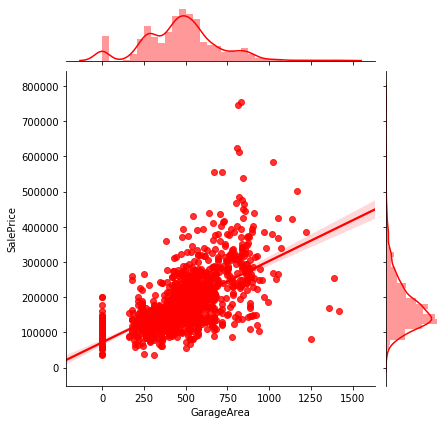

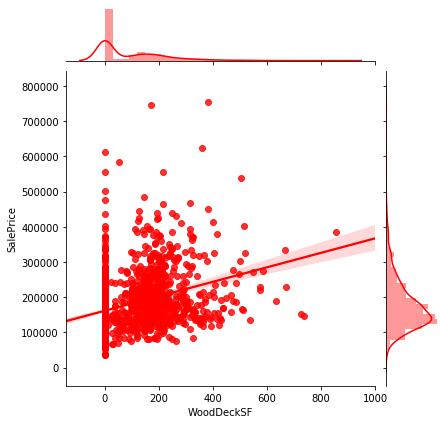

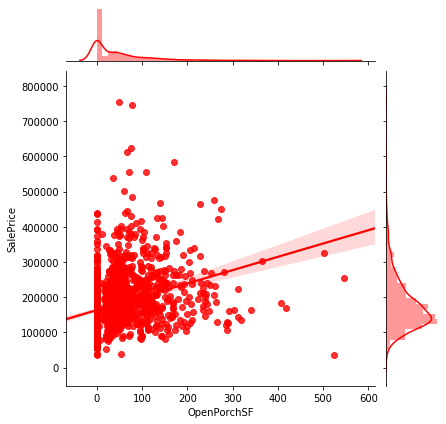

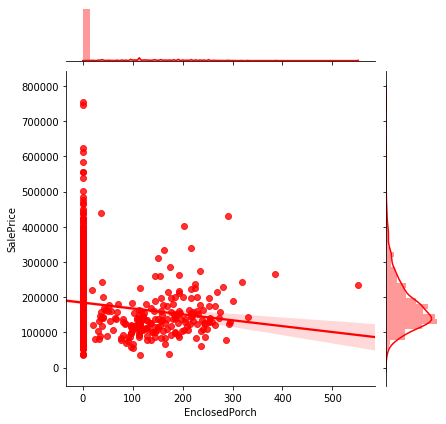

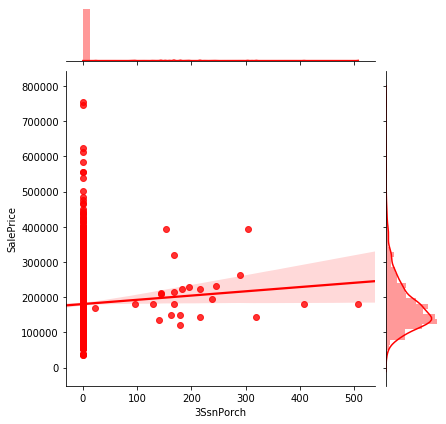

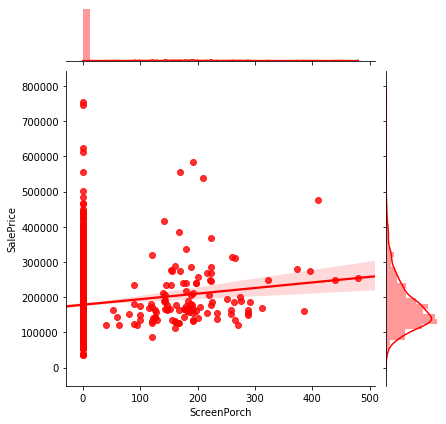

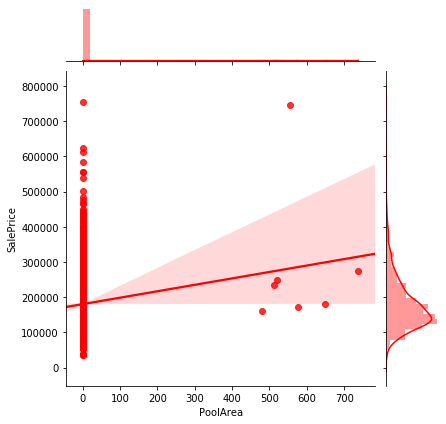

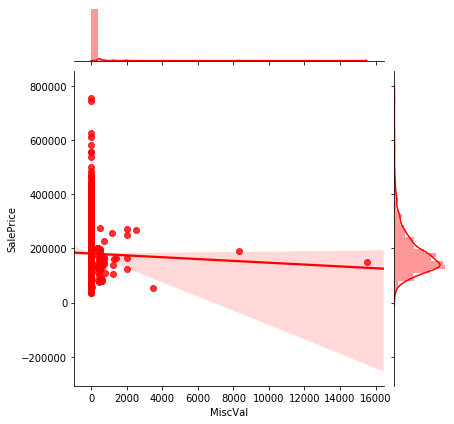

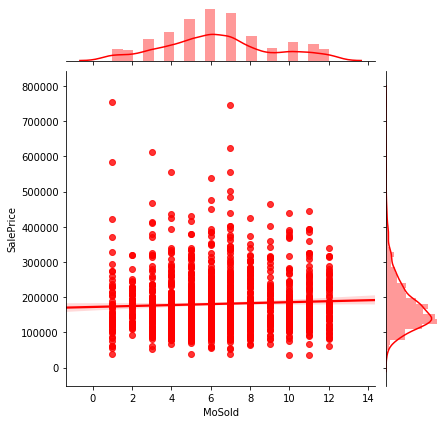

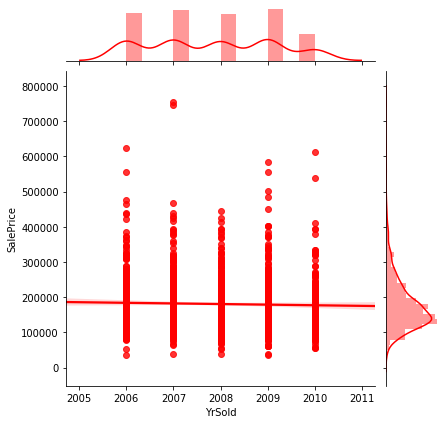

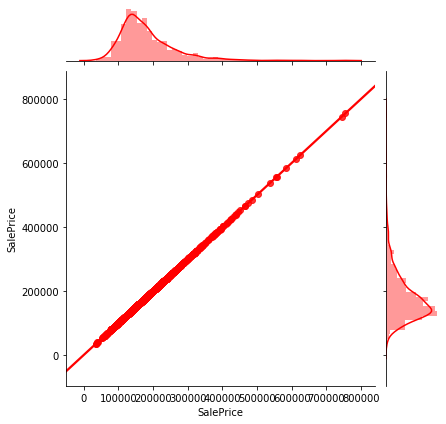

In [25]:
for i in num_df.columns:
    sns.jointplot(x=i, y='SalePrice', data=num_df, kind='reg', color='r')
    plt.show()

From, the above plots, we can see that as area increases or the newer the house is, higher the sale price.

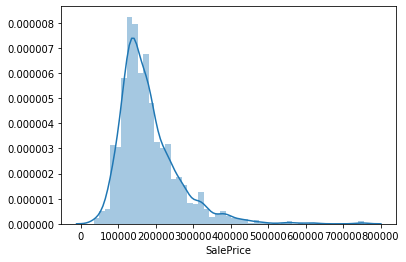

In [26]:
# Looking at the distribution of the SalePrice
sns.distplot(num_df.SalePrice);

We, can see that the data is highly right skewed. Thus, doing the log Transformation.

In [27]:
#train['Skewed_SP'] = np.log(train['SalePrice']+1)

house_final = housepricesdata.copy()
house_final.SalePrice = house_final.SalePrice.transform(lambda X: np.log(X))

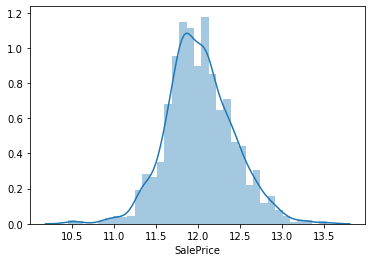

In [28]:
# Looking at the distribution of the SalePrice
sns.distplot(house_final.SalePrice);

After log transformation, we see that data has almost become normally distributed.

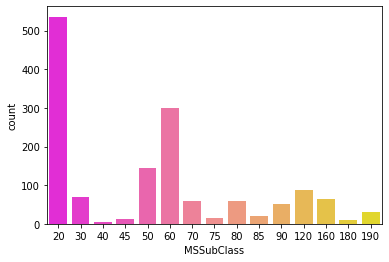

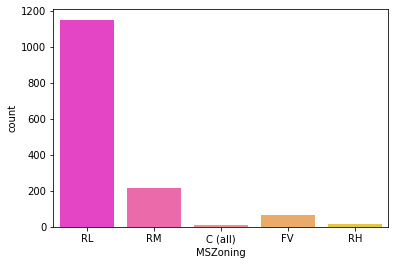

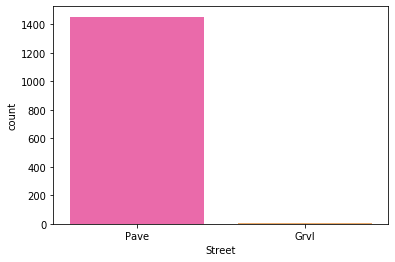

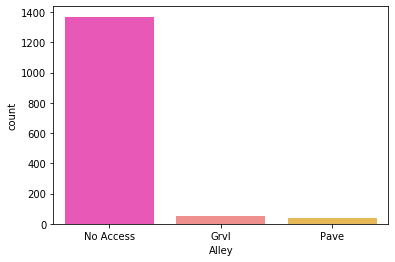

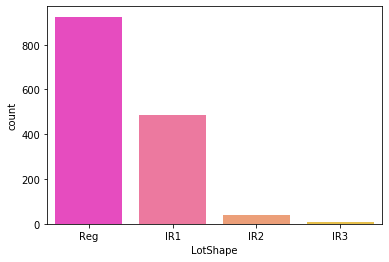

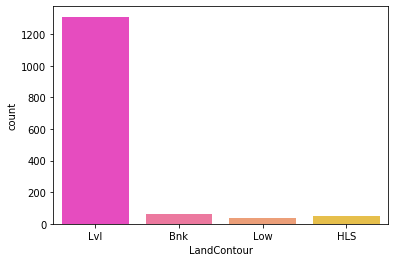

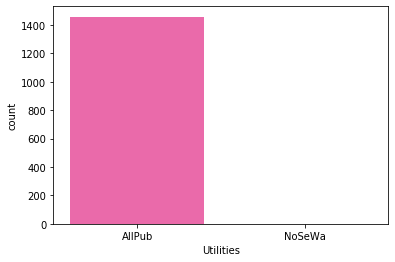

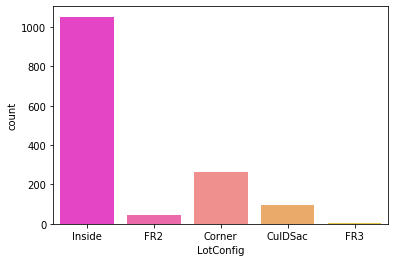

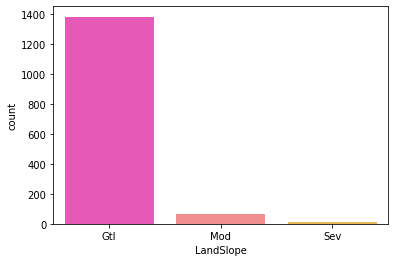

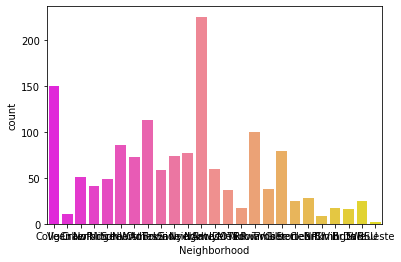

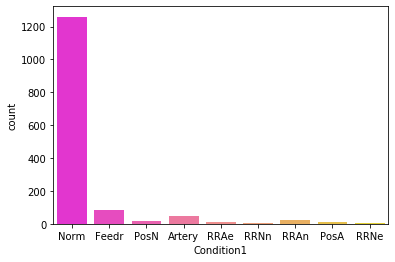

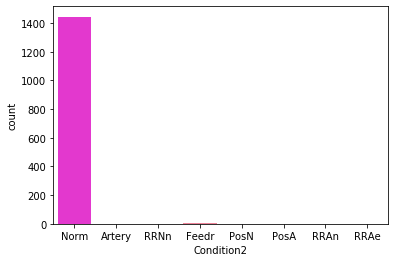

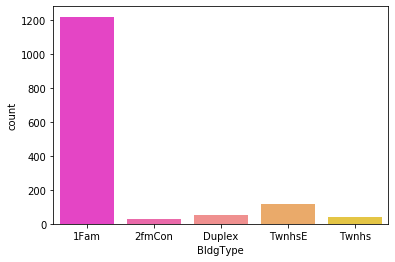

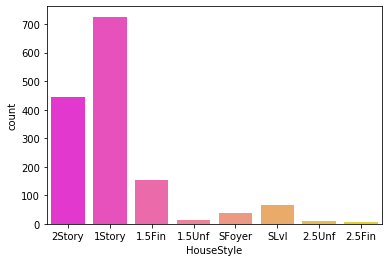

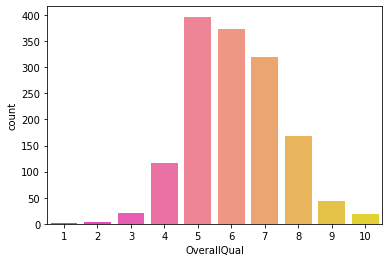

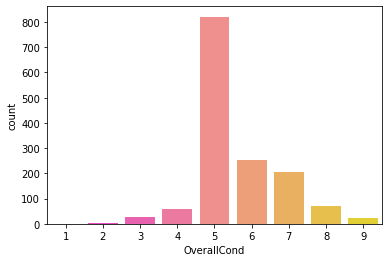

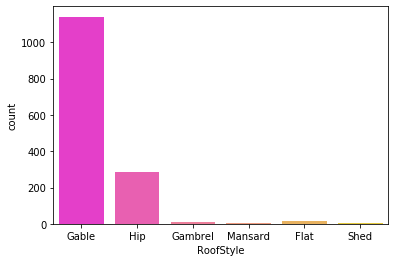

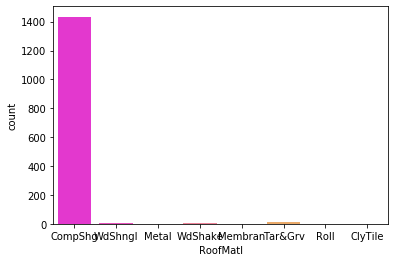

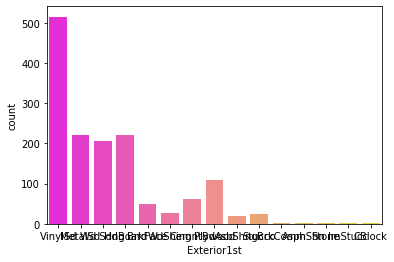

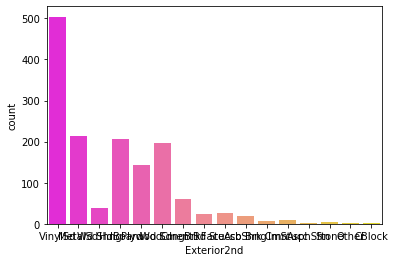

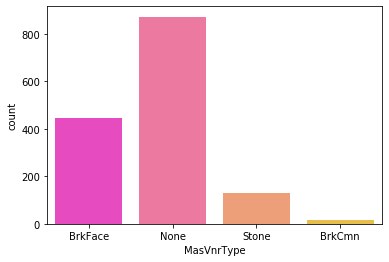

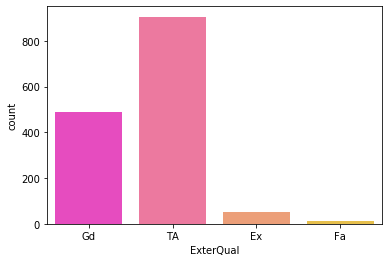

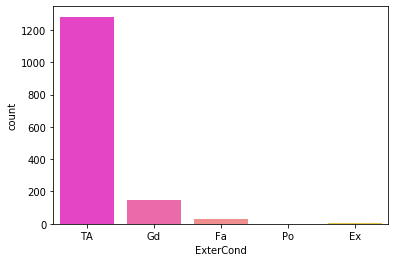

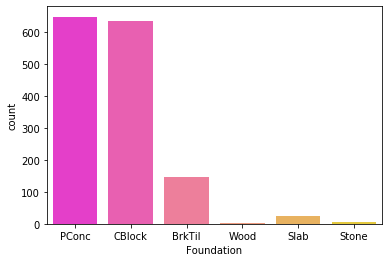

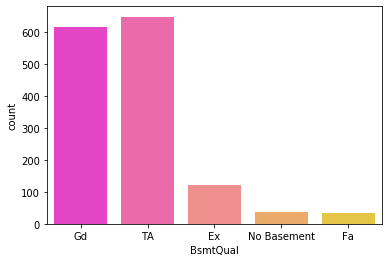

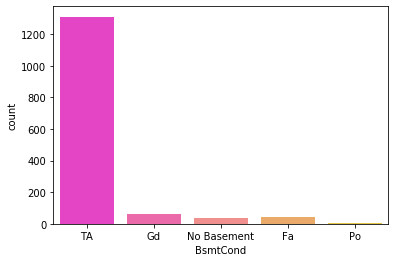

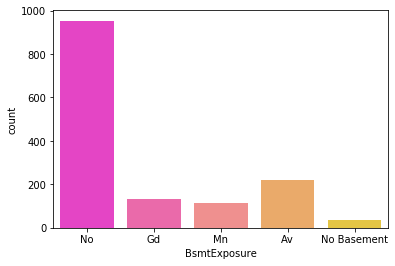

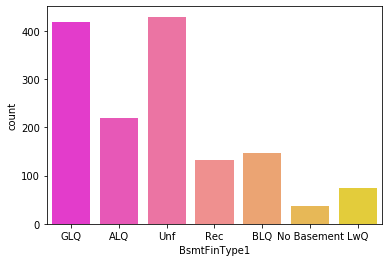

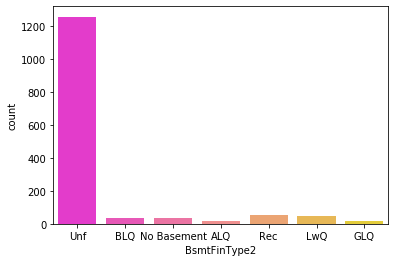

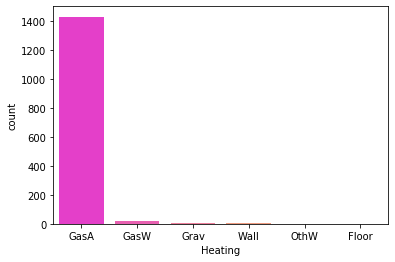

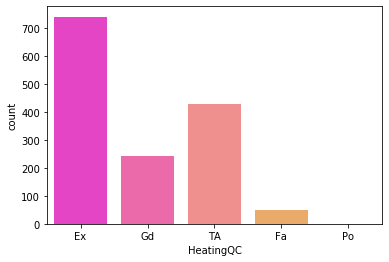

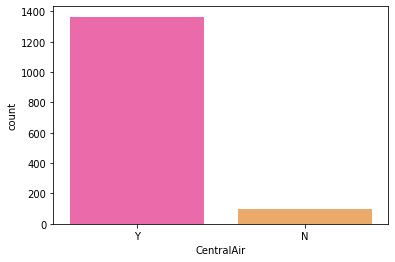

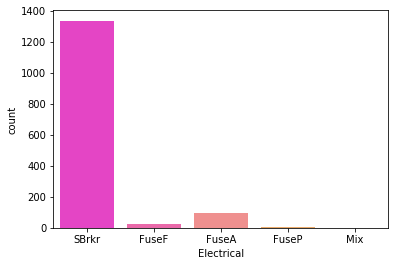

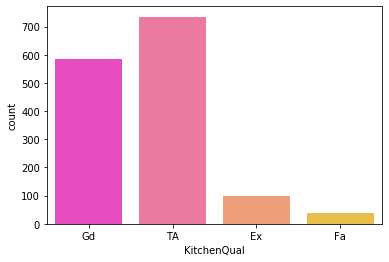

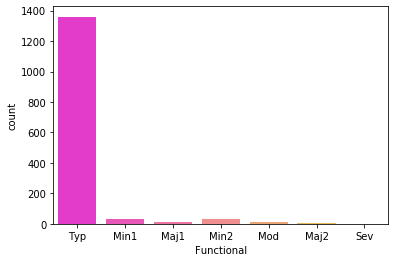

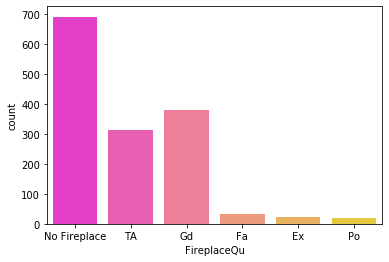

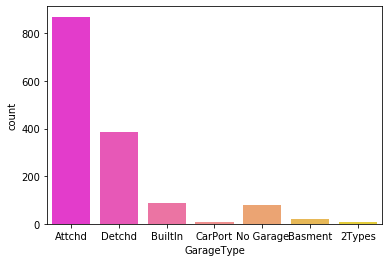

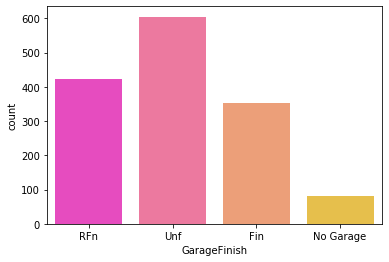

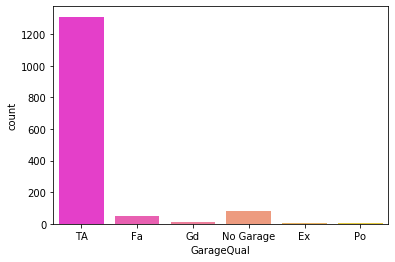

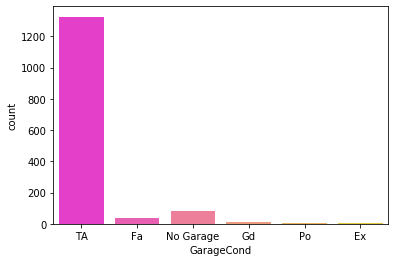

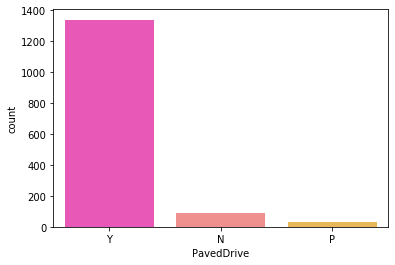

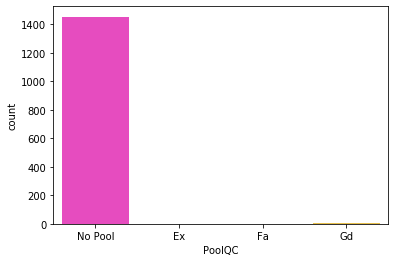

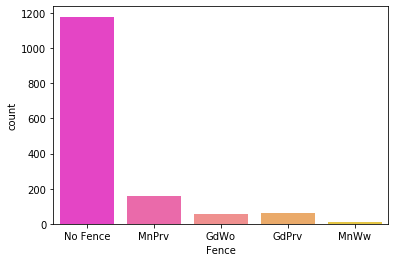

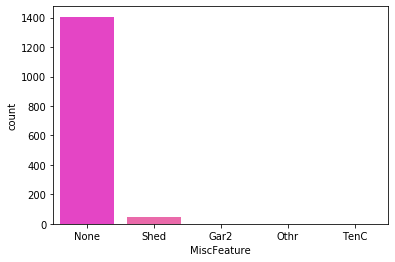

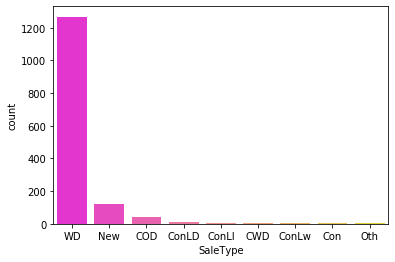

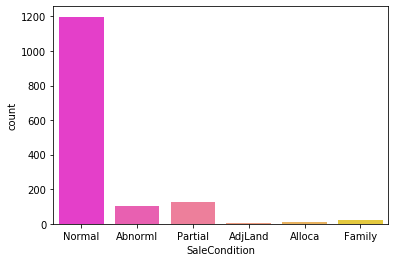

In [29]:
for i in cat_df:
    sns.countplot(x=i, data=cat_df, palette='spring')
    plt.show()

Now, we will begin with model building.

In [30]:
# Performing label encoding for categorical type features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for i in encode_cols:
    house_final[i] = le.fit_transform(house_final[i])


In [31]:
## Standardizining the data
from scipy.stats import zscore
house_final_scaled = house_final.drop('SalePrice',1).apply(zscore)
house_final_scaled['SalePrice'] = house_final['SalePrice']
house_final_scaled.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0    0.200350 -0.045532    -0.220875 -0.207142  0.064238  0.024699  0.750731   
1   -1.001421 -0.045532     0.460320 -0.091886  0.064238  0.024699  0.750731   
2    0.200350 -0.045532    -0.084636  0.073480  0.064238  0.024699 -1.378933   
3    0.440704 -0.045532    -0.447940 -0.096897  0.064238  0.024699 -1.378933   
4    0.200350 -0.045532     0.641972  0.375148  0.064238  0.024699 -1.378933   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     0.314667   -0.02618   0.604670  -0.225716     -1.206215   -0.036289   
1     0.314667   -0.02618  -0.628316  -0.225716      1.954302   -1.188074   
2     0.314667   -0.02618   0.604670  -0.225716     -1.206215   -0.036289   
3     0.314667   -0.02618  -1.861302  -0.225716     -1.039872   -0.036289   
4     0.314667   -0.02618  -0.628316  -0.225716      0.457215   -0.036289   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0    -0.03174 -0.411691    1.026689     0.651479    -0.517200   1.050994   
1    -0.03174 -0.411691   -0.543457    -0.071836     2.179628   0.156734   
2    -0.03174 -0.411691    1.026689     0.651479    -0.517200   0.984752   
3    -0.03174 -0.411691    1.026689     0.651479    -0.517200  -1.863632   
4    -0.03174 -0.411691    1.026689     1.374795    -0.517200   0.951632   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.878668  -0.491516 -0.125797     0.743092     0.751626   -1.241449   
1     -0.429577  -0.491516 -0.125797    -0.508251    -0.661060    0.387047   
2      0.830215  -0.491516 -0.125797     0.743092     0.751626   -1.241449   
3     -0.720298  -0.491516 -0.125797     1.055928     1.316701    0.387047   
4      0.733308  -0.491516 -0.125797     0.743092     0.751626   -1.241449   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.514104  -0.777976   0.364207    0.835599 -0.566939  0.325405   
1   -0.570750   0.663451   0.364207   -0.549162 -0.566939  0.325405   
2    0.325915  -0.777976   0.364207    0.835599 -0.566939  0.325405   
3   -0.570750   0.663451   0.364207   -1.933923  0.997770 -2.834848   
4    1.366489  -0.777976   0.364207    0.835599 -0.566939  0.325405   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.591905     -0.510942    0.575425      0.344051   -0.288653   
1     -1.124444     -1.399536    1.171992      0.344051   -0.288653   
2     -0.266269     -0.510942    0.092907      0.344051   -0.288653   
3      0.591905     -1.399536   -0.499274      0.344051   -0.288653   
4     -1.982619     -0.510942    0.463568      0.344051   -0.288653   

   BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  \
0  -0.944591    -0.459303 -0.123046  -0.884658    0.263813    0.302403   
1  -0.641228     0.466465 -0.123046  -0.884658    0.263813    0.302403   
2  -0.301643    -0.313369 -0.123046  -0.884658    0.263813    0.302403   
3  -0.061670    -0.687324 -0.123046   0.265476    0.263813    0.302403   
4  -0.174865     0.199680 -0.123046  -0.884658    0.263813    0.302403   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.793434  1.161852     -0.120242   0.370333      1.107810     -0.241061   
1  0.257140 -0.795163     -0.120242  -0.482512     -0.819964      3.948809   
2 -0.627826  1.189351     -0.120242   0.515013      1.107810     -0.241061   
3 -0.521734  0.937276     -0.120242   0.383659      1.107810     -0.241061   
4 -0.045611  1.617877     -0.120242   1.299326      1.107810     -0.241061   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.789741  1.227585      0.163779     -0.211454    -0.409369      0.912210   
1  0.789741 -0.761621      0.163779     -0.211454     0.795629     -0.318683   
2  0.789741  1.227585      0.163779     -0.211454    -0.409369     -0.318683   
3 -1.026041 -0.761621      0.163779     -0.21

### Statistical Modeling

In [32]:
house_final_scaled.shape

(1460, 80)

In [33]:
y = house_final_scaled.SalePrice
X = house_final_scaled.drop('SalePrice', axis=1)
X = X.assign(const=1)

In [34]:
X.shape

(1460, 80)

In [35]:
y.shape

(1460,)

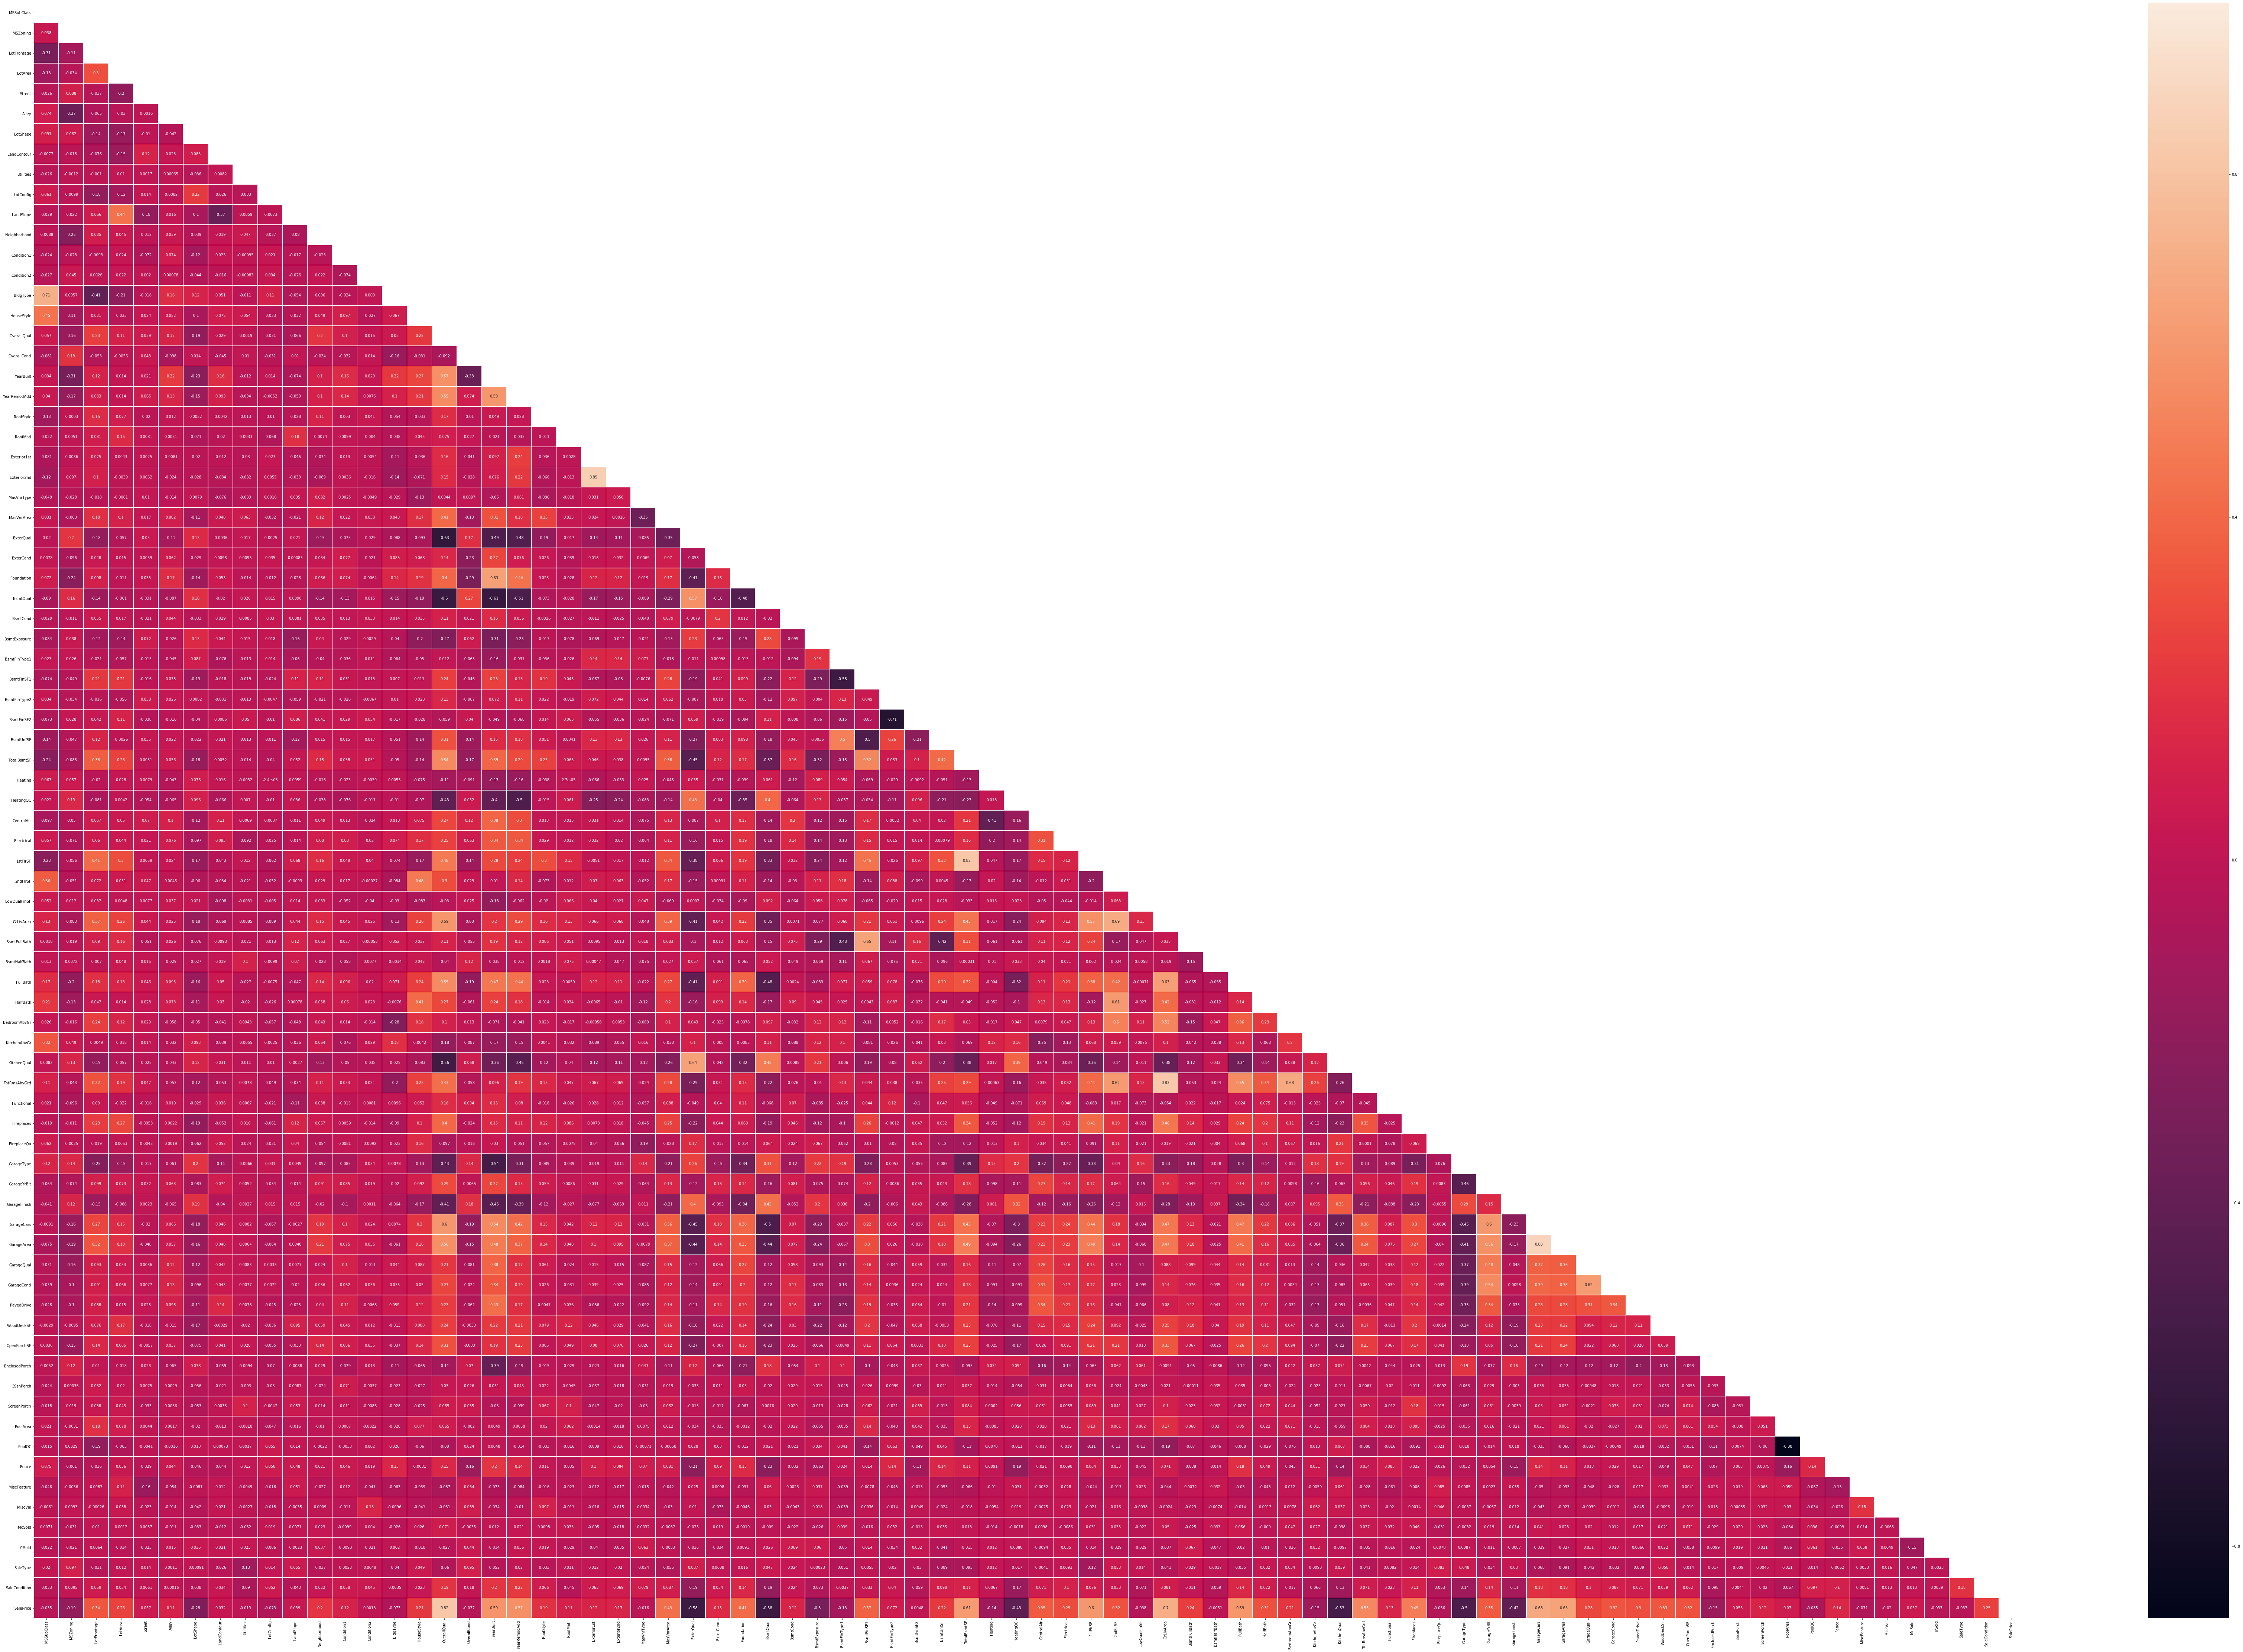

In [36]:
# Correlation between features
plt.figure(figsize=(120,80))
corr = house_final_scaled.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, linewidth=0.5, annot=True)
plt.show()

As, there are so many features, graph is not clear.

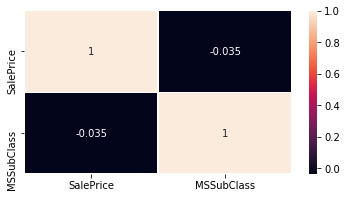

Corelation between SalePrice & MSSubClass is: -0.0355
which is negligible co-relation


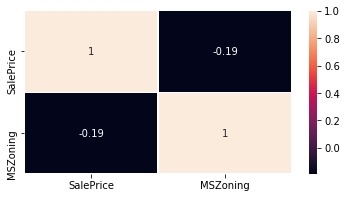

Corelation between SalePrice & MSZoning is: -0.1889
which is negligible co-relation


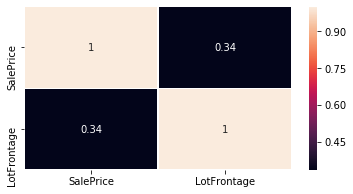

Corelation between SalePrice & LotFrontage is: 0.3353
which is low positive co-relation


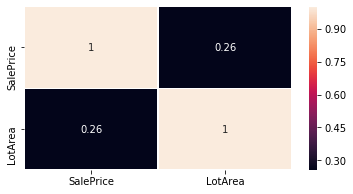

Corelation between SalePrice & LotArea is: 0.2573
which is low positive co-relation


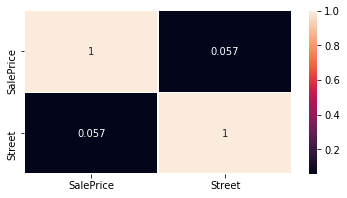

Corelation between SalePrice & Street is: 0.0574
which is negligible co-relation


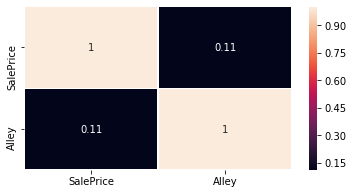

Corelation between SalePrice & Alley is: 0.1128
which is negligible co-relation


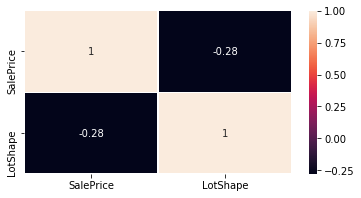

Corelation between SalePrice & LotShape is: -0.2781
which is low negative co-relation


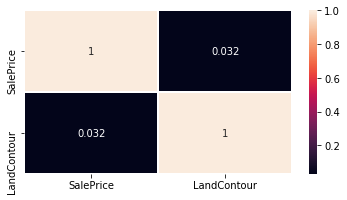

Corelation between SalePrice & LandContour is: 0.0323
which is negligible co-relation


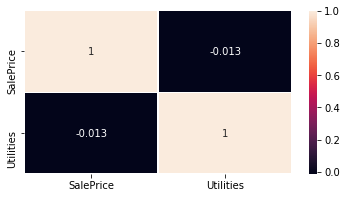

Corelation between SalePrice & Utilities is: -0.0126
which is negligible co-relation


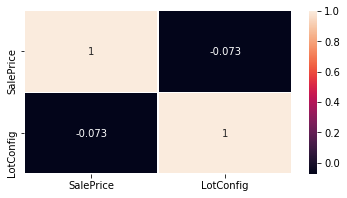

Corelation between SalePrice & LotConfig is: -0.0729
which is negligible co-relation


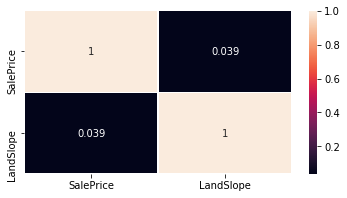

Corelation between SalePrice & LandSlope is: 0.0385
which is negligible co-relation


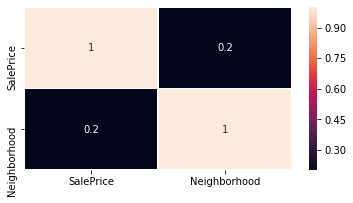

Corelation between SalePrice & Neighborhood is: 0.2017
which is low positive co-relation


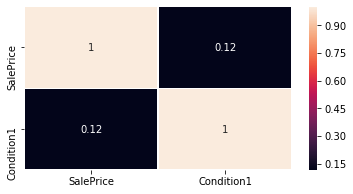

Corelation between SalePrice & Condition1 is: 0.1159
which is negligible co-relation


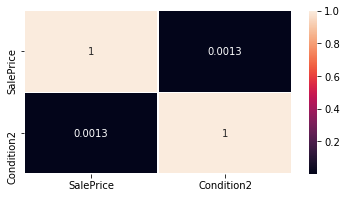

Corelation between SalePrice & Condition2 is: 0.0013
which is negligible co-relation


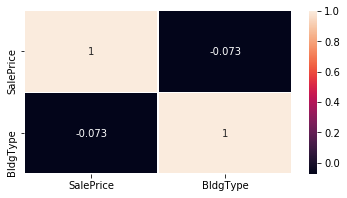

Corelation between SalePrice & BldgType is: -0.0726
which is negligible co-relation


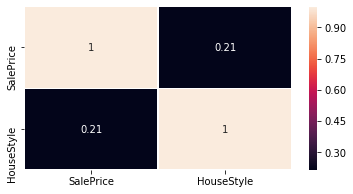

Corelation between SalePrice & HouseStyle is: 0.2147
which is low positive co-relation


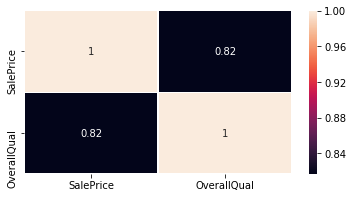

Corelation between SalePrice & OverallQual is: 0.8172
which is high positive co-relation


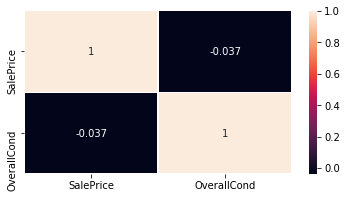

Corelation between SalePrice & OverallCond is: -0.0369
which is negligible co-relation


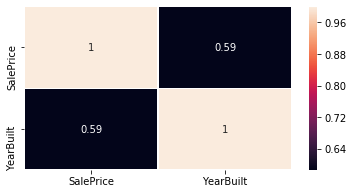

Corelation between SalePrice & YearBuilt is: 0.5866
which is high positive co-relation


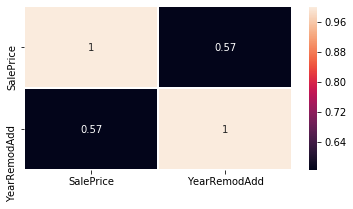

Corelation between SalePrice & YearRemodAdd is: 0.5656
which is high positive co-relation


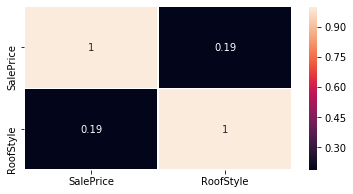

Corelation between SalePrice & RoofStyle is: 0.1869
which is negligible co-relation


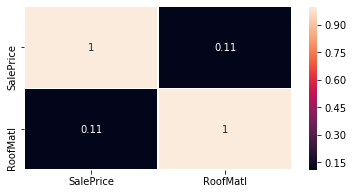

Corelation between SalePrice & RoofMatl is: 0.1075
which is negligible co-relation


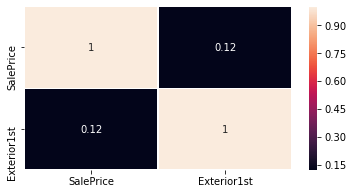

Corelation between SalePrice & Exterior1st is: 0.122
which is negligible co-relation


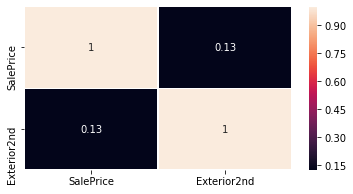

Corelation between SalePrice & Exterior2nd is: 0.1258
which is negligible co-relation


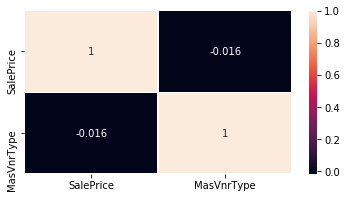

Corelation between SalePrice & MasVnrType is: -0.0158
which is negligible co-relation


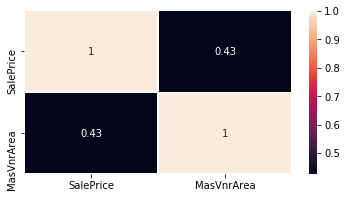

Corelation between SalePrice & MasVnrArea is: 0.4268
which is low positive co-relation


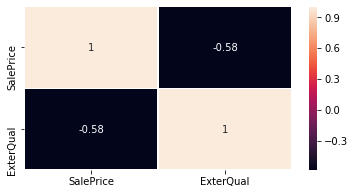

Corelation between SalePrice & ExterQual is: -0.5822
which is high negative co-relation


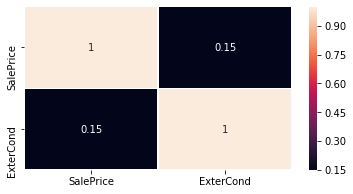

Corelation between SalePrice & ExterCond is: 0.1486
which is negligible co-relation


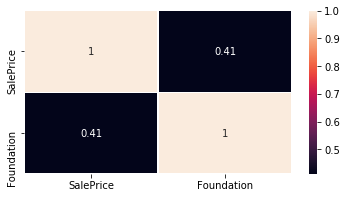

Corelation between SalePrice & Foundation is: 0.4121
which is low positive co-relation


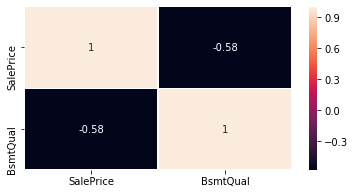

Corelation between SalePrice & BsmtQual is: -0.577
which is high negative co-relation


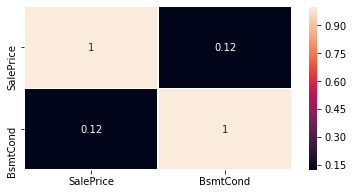

Corelation between SalePrice & BsmtCond is: 0.1225
which is negligible co-relation


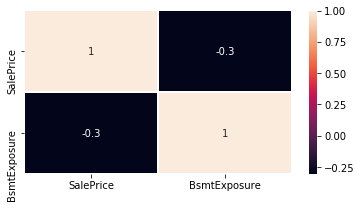

Corelation between SalePrice & BsmtExposure is: -0.3038
which is low negative co-relation


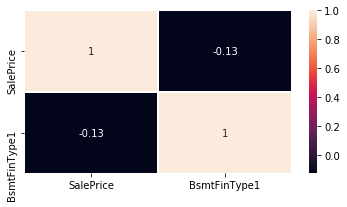

Corelation between SalePrice & BsmtFinType1 is: -0.1253
which is negligible co-relation


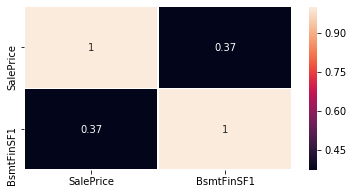

Corelation between SalePrice & BsmtFinSF1 is: 0.372
which is low positive co-relation


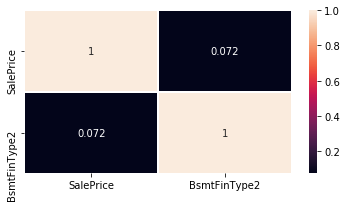

Corelation between SalePrice & BsmtFinType2 is: 0.0724
which is negligible co-relation


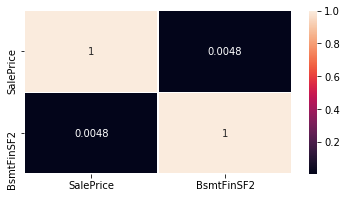

Corelation between SalePrice & BsmtFinSF2 is: 0.0048
which is negligible co-relation


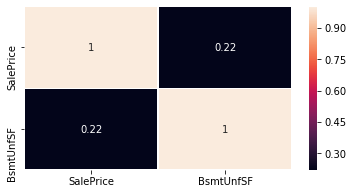

Corelation between SalePrice & BsmtUnfSF is: 0.222
which is low positive co-relation


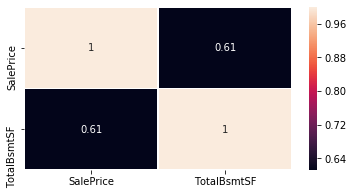

Corelation between SalePrice & TotalBsmtSF is: 0.6121
which is high positive co-relation


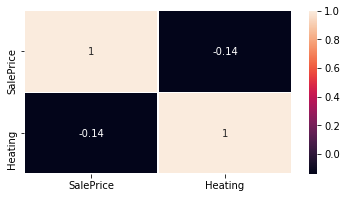

Corelation between SalePrice & Heating is: -0.1399
which is negligible co-relation


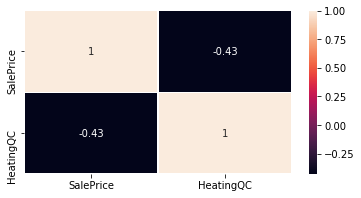

Corelation between SalePrice & HeatingQC is: -0.4259
which is low negative co-relation


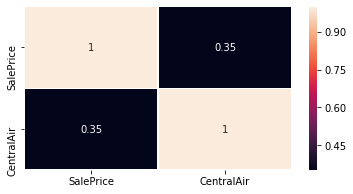

Corelation between SalePrice & CentralAir is: 0.3516
which is low positive co-relation


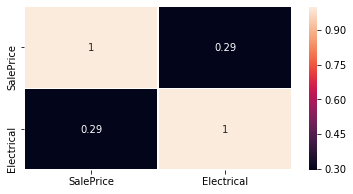

Corelation between SalePrice & Electrical is: 0.2944
which is low positive co-relation


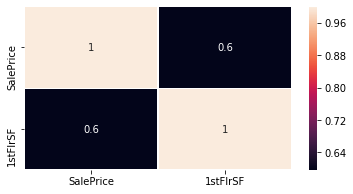

Corelation between SalePrice & 1stFlrSF is: 0.597
which is high positive co-relation


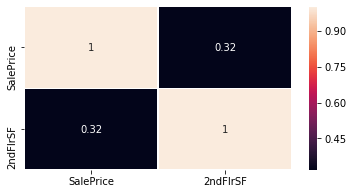

Corelation between SalePrice & 2ndFlrSF is: 0.3193
which is low positive co-relation


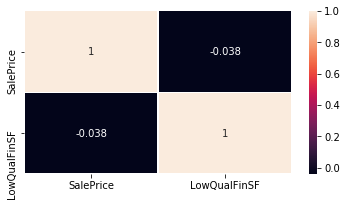

Corelation between SalePrice & LowQualFinSF is: -0.038
which is negligible co-relation


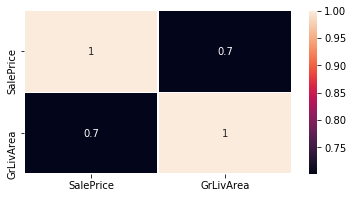

Corelation between SalePrice & GrLivArea is: 0.7009
which is high positive co-relation


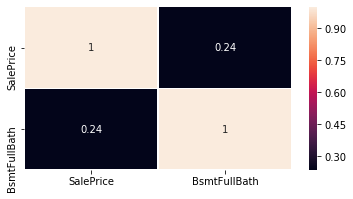

Corelation between SalePrice & BsmtFullBath is: 0.2362
which is low positive co-relation


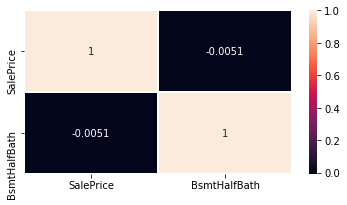

Corelation between SalePrice & BsmtHalfBath is: -0.0051
which is negligible co-relation


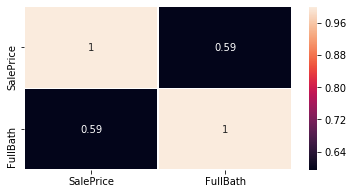

Corelation between SalePrice & FullBath is: 0.5948
which is high positive co-relation


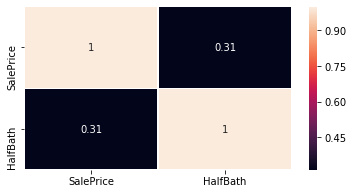

Corelation between SalePrice & HalfBath is: 0.314
which is low positive co-relation


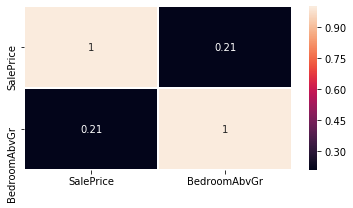

Corelation between SalePrice & BedroomAbvGr is: 0.209
which is low positive co-relation


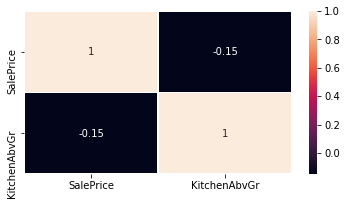

Corelation between SalePrice & KitchenAbvGr is: -0.1475
which is negligible co-relation


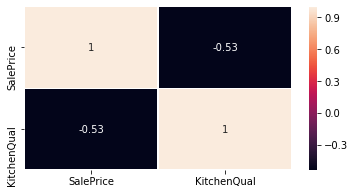

Corelation between SalePrice & KitchenQual is: -0.5344
which is high negative co-relation


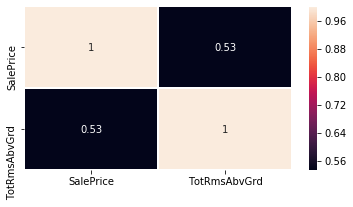

Corelation between SalePrice & TotRmsAbvGrd is: 0.5344
which is high positive co-relation


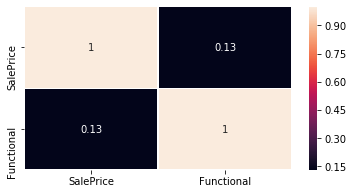

Corelation between SalePrice & Functional is: 0.1314
which is negligible co-relation


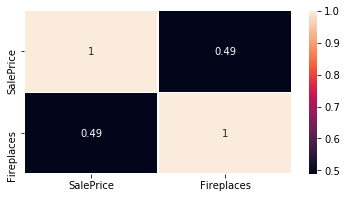

Corelation between SalePrice & Fireplaces is: 0.4894
which is low positive co-relation


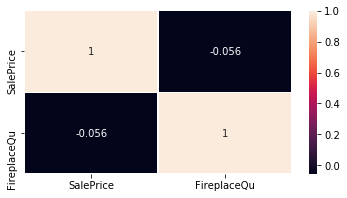

Corelation between SalePrice & FireplaceQu is: -0.0557
which is negligible co-relation


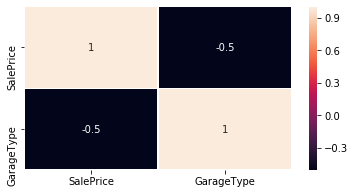

Corelation between SalePrice & GarageType is: -0.5031
which is high negative co-relation


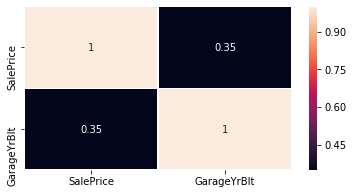

Corelation between SalePrice & GarageYrBlt is: 0.349
which is low positive co-relation


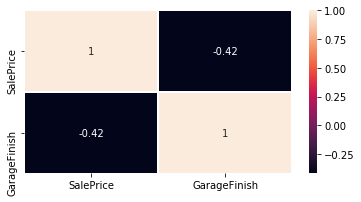

Corelation between SalePrice & GarageFinish is: -0.4174
which is low negative co-relation


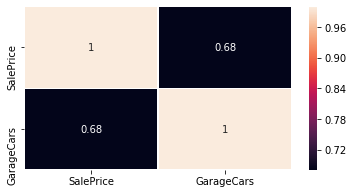

Corelation between SalePrice & GarageCars is: 0.6806
which is high positive co-relation


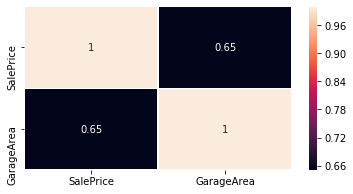

Corelation between SalePrice & GarageArea is: 0.6509
which is high positive co-relation


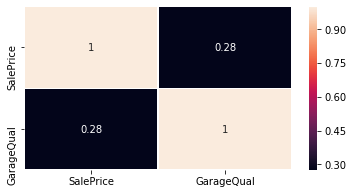

Corelation between SalePrice & GarageQual is: 0.2757
which is low positive co-relation


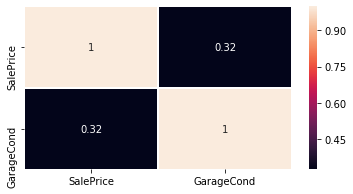

Corelation between SalePrice & GarageCond is: 0.3237
which is low positive co-relation


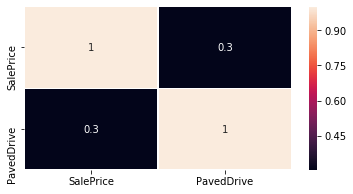

Corelation between SalePrice & PavedDrive is: 0.3047
which is low positive co-relation


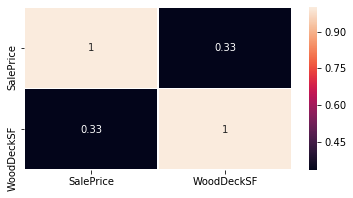

Corelation between SalePrice & WoodDeckSF is: 0.3341
which is low positive co-relation


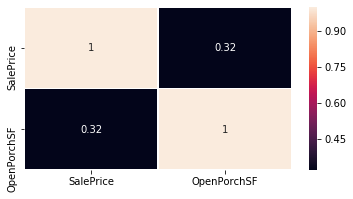

Corelation between SalePrice & OpenPorchSF is: 0.3211
which is low positive co-relation


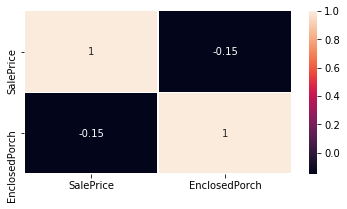

Corelation between SalePrice & EnclosedPorch is: -0.1491
which is negligible co-relation


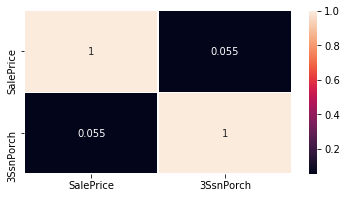

Corelation between SalePrice & 3SsnPorch is: 0.0549
which is negligible co-relation


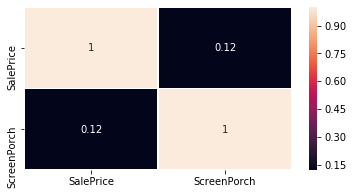

Corelation between SalePrice & ScreenPorch is: 0.1212
which is negligible co-relation


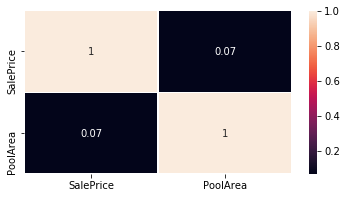

Corelation between SalePrice & PoolArea is: 0.0698
which is negligible co-relation


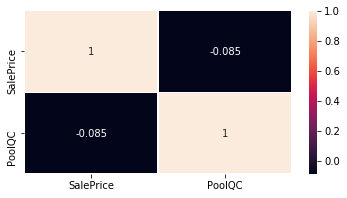

Corelation between SalePrice & PoolQC is: -0.0851
which is negligible co-relation


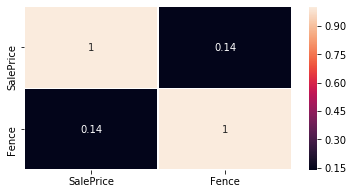

Corelation between SalePrice & Fence is: 0.1395
which is negligible co-relation


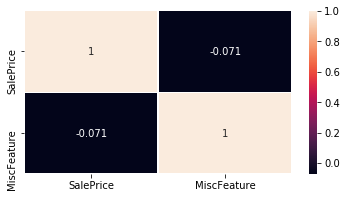

Corelation between SalePrice & MiscFeature is: -0.0711
which is negligible co-relation


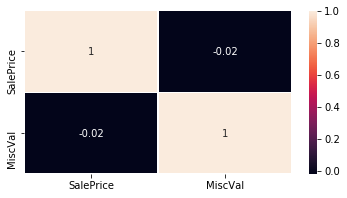

Corelation between SalePrice & MiscVal is: -0.02
which is negligible co-relation


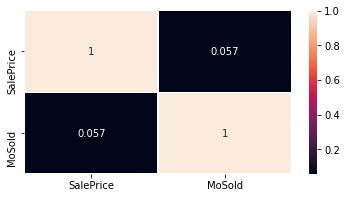

Corelation between SalePrice & MoSold is: 0.0573
which is negligible co-relation


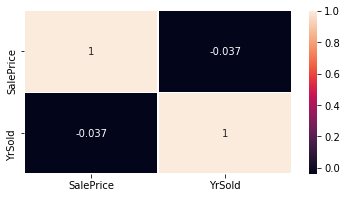

Corelation between SalePrice & YrSold is: -0.0373
which is negligible co-relation


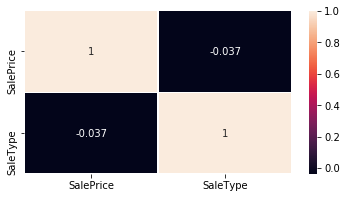

Corelation between SalePrice & SaleType is: -0.0367
which is negligible co-relation


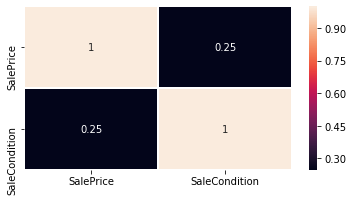

Corelation between SalePrice & SaleCondition is: 0.2488
which is low positive co-relation


In [37]:
# Corelation within features
for i in house_final_scaled.drop('SalePrice',1):
    plt.figure(figsize=(6,3))
    corr = house_final_scaled[['SalePrice',i]].corr()
    sns.heatmap(corr, linewidth=0.5, annot=True)
    plt.show()
    print("Corelation between SalePrice &",i,'is:', round(corr.iloc[1,0],4))
    if round(corr.iloc[1,0],4)>=0.5:
        print('which is high positive co-relation')
    elif 0.2<=round(corr.iloc[1,0],4)<0.5:
        print('which is low positive co-relation')
    elif -0.2<round(corr.iloc[1,0],4)<0.2:
        print('which is negligible co-relation')
    elif -0.5<round(corr.iloc[1,0],4)<=-0.2:
        print('which is low negative co-relation')
    elif round(corr.iloc[1,0],4)<=-0.5:
        print('which is high negative co-relation')

In [38]:
# Checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

pd.DataFrame({'vif':vif}, index=X.columns)

vif
MSSubClass     5.877637
MSZoning       1.508787
LotFrontage    1.758253
LotArea        1.639578
Street         1.183140
Alley          1.288143
LotShape       1.253344
LandContour    1.318677
Utilities      1.100901
LotConfig      1.143024
LandSlope      1.629386
Neighborhood   1.264222
Condition1     1.132517
Condition2     1.092309
BldgType       4.732248
HouseStyle     2.412531
OverallQual    3.932331
OverallCond    1.952541
YearBuilt      7.408894
YearRemodAdd   2.759702
RoofStyle      1.292469
RoofMatl       1.190355
Exterior1st    4.043546
Exterior2nd    4.051831
MasVnrType     1.399066
MasVnrArea     1.779965
ExterQual      2.716163
ExterCond      1.227448
Foundation     2.071178
BsmtQual       2.519272
...                 ...
BedroomAbvGr   2.687528
KitchenAbvGr   1.850254
KitchenQual    2.086687
TotRmsAbvGrd   5.317486
Functional     1.258692
Fireplaces     1.692237
FireplaceQu    1.238359
GarageType     2.163698
GarageYrBlt    2.838770
GarageFinish   1.799428
GarageCars     6.489265
GarageArea     5.794809
GarageQual     2.012701
GarageCond     2.079404
PavedDrive     1.523607
WoodDeckSF     1.305055
OpenPorchSF    1.311846
EnclosedPorch  1.334775
3SsnPorch      1.052555
ScreenPorch    1.169587
PoolArea       5.084054
PoolQC         5.259860
Fence          1.243546
MiscFeature    1.173542
MiscVal        1.113369
MoSold         1.077520
YrSold         1.096966
SaleType       1.163168
SaleCondition  1.212918
const          1.000000

[80 rows x 1 columns]

In [39]:
y = house_final_scaled.SalePrice
X = house_final_scaled.drop('SalePrice', axis=1)
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:11:20   Log-Likelihood:                 862.53
No. Observations:                1460   AIC:                            -1569.
Df Residuals:                    1382   BIC:                            -1157.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass        0.0036      0.009      0.415      0.678      -0.014       0.021
MSZoning         -0.0084      0.004     -1.901      0.057      -0.017       0.000
LotFrontage      -0.0097      0.005     -2.034      0.042      -0.019      -0.000
LotArea           0.0162      0.005      3.517      0.000       0.007       0.025
Street            0.0109      0.004      2.777      0.006       0.003       0.019
Alley             0.0073      0.004      1.775      0.076      -0.001       0.015
LotShape         -0.0087      0.004     -2.162      0.031      -0.017      -0.001
LandContour       0.0075      0.004      1.808      0.071      -0.001       0.016
Utilities        -0.0047      0.004     -1.244      0.214      -0.012       0.003
LotConfig        -0.0026      0.004     -0.671      0.503      -0.010       0.005
LandSlope         0.0091      0.005      1.988      0.047       0.000       0.018
Neighborhood      0.0070      0.004      1.733      0.083      -0.001       0.015
Condition1        0.0007      0.004      0.176      0.860      -0.007       0.008
Condition2       -0.0112      0.004     -2.966      0.003      -0.019      -0.004
BldgType         -0.0264      0.008     -3.372      0.001      -0.042      -0.011
HouseStyle       -0.0121      0.006     -2.155      0.031      -0.023      -0.001
OverallQual       0.0942      0.007     13.170      0.000       0.080       0.108
OverallCond       0.0465      0.005      9.235      0.000       0.037       0.056
YearBuilt         0.0475      0.010      4.843      0.000       0.028       0.067
YearRemodAdd      0.0118      0.006      1.976      0.048    8.68e-05       0.024
RoofStyle         0.0047      0.004      1.146      0.252      -0.003       0.013
RoofMatl          0.0065      0.004      1.649      0.099      -0.001       0.014
Exterior1st      -0.0134      0.007     -1.845      0.065      -0.028       0.001
Exterior2nd       0.0130      0.007      1.796      0.073      -0.001       0.027
MasVnrType        0.0021      0.004      0.491      0.624      -0.006       0.010
MasVnrArea        0.0037      0.005      0.764      0.445      -0.006       0.013
ExterQual        -0.0046      0.006     -0.776      0.438      -0.016       0.007
ExterCond         0.0088      0.004      2.207      0.027       0.001       0.017
Foundation        0.0083      0.005      1.608      0.108      -0.002       0.019
BsmtQual         -0.0147      0.006     -2.562      0.011      -0.026      -0.003
BsmtCond          0.0053      0.004      1.315      0.189      -0.003       0.013
BsmtExposure     -0.0105      0.005     -2.309      0.021      -0.019      -0.002
BsmtFinType1     -0.0137      0.005     -2.702      0.007      -0.024      -0.004
BsmtFinSF1        0.0044      0.005      0.974      0.330      -0.004       0.013
BsmtFinType2      0.0088      0.005      1.615   

There are 39 variables having p-value less than 0.05, we will use only those features to build our model.

In [40]:
# significant features
rel_features = ['LotFrontage','LotArea','Street','LotShape','LandSlope','Condition2','BldgType','HouseStyle',
                'OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtExposure',
                'BsmtFinType1','BsmtFinSF2','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF',
                'GrLivArea','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'PoolQC','YrSold','SaleCondition']

In [41]:
y = house_final_scaled.SalePrice
X = house_final_scaled[['LotFrontage','LotArea','Street','LotShape','LandSlope','Condition2','BldgType','HouseStyle',
                'OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtExposure',
                'BsmtFinType1','BsmtFinSF2','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF',
                'GrLivArea','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'PoolQC','YrSold','SaleCondition']]
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     273.0
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:11:40   Log-Likelihood:                 830.81
No. Observations:                1460   AIC:                            -1582.
Df Residuals:                    1420   BIC:                            -1370.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage      -0.0086      0.005     -1.841      0.066      -0.018       0.001
LotArea           0.0164      0.005      3.613      0.000       0.008       0.025
Street            0.0107      0.004      2.810      0.005       0.003       0.018
LotShape         -0.0089      0.004     -2.281      0.023      -0.017      -0.001
LandSlope         0.0081      0.004      1.904      0.057      -0.000       0.016
Condition2       -0.0110      0.004     -2.989      0.003      -0.018      -0.004
BldgType         -0.0265      0.004     -6.038      0.000      -0.035      -0.018
HouseStyle       -0.0099      0.005     -2.059      0.040      -0.019      -0.000
OverallQual       0.1018      0.007     15.076      0.000       0.089       0.115
OverallCond       0.0445      0.005      9.075      0.000       0.035       0.054
YearBuilt         0.0630      0.008      7.489      0.000       0.047       0.080
YearRemodAdd      0.0136      0.006      2.382      0.017       0.002       0.025
ExterCond         0.0085      0.004      2.201      0.028       0.001       0.016
BsmtQual         -0.0146      0.005     -2.677      0.008      -0.025      -0.004
BsmtExposure     -0.0085      0.004     -1.952      0.051      -0.017    4.17e-05
BsmtFinType1     -0.0170      0.004     -3.812      0.000      -0.026      -0.008
BsmtFinSF2        0.0041      0.004      1.078      0.281      -0.003       0.012
TotalBsmtSF       0.0178      0.007      2.452      0.014       0.004       0.032
HeatingQC        -0.0140      0.004     -3.146      0.002      -0.023      -0.005
CentralAir        0.0196      0.004      4.482      0.000       0.011       0.028
1stFlrSF          0.0304      0.031      0.974      0.330      -0.031       0.092
2ndFlrSF          0.0185      0.035      0.530      0.596      -0.050       0.087
GrLivArea         0.0771      0.042      1.842      0.066      -0.005       0.159
BsmtFullBath      0.0259      0.005      5.689      0.000       0.017       0.035
FullBath          0.0138      0.006      2.437      0.015       0.003       0.025
KitchenQual      -0.0221      0.005     -4.631      0.000      -0.031      -0.013
TotRmsAbvGrd      0.0201      0.007      2.887      0.004       0.006       0.034
Functional        0.0178      0.004      4.503      0.000       0.010       0.026
Fireplaces        0.0232      0.005      5.100      0.000       0.014       0.032
GarageType       -0.0114      0.005     -2.348      0.019      -0.021      -0.002
GarageCars        0.0493      0.005      9.576      0.000       0.039       0.059
PavedDrive        0.0128      0.004      2.964      0.003       0.004       0.021
WoodDeckSF        0.0134      0.004      3.305      0.001       0.005       0.021
EnclosedPorch     0.0085      0.004      2.050      0.041       0.000       0.017
ScreenPorch       0.0198      0.004      5.161   

In [42]:
# Now, dropping insignificant features
rel_features = ['LotArea','Street','LotShape','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
                'YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC',
                'CentralAir','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'YrSold','SaleCondition']

In [43]:
y = house_final_scaled.SalePrice
X = house_final_scaled[['LotArea','Street','LotShape','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
                'YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC',
                'CentralAir','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'YrSold','SaleCondition']]
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:11:45   Log-Likelihood:                 754.28
No. Observations:                1460   AIC:                            -1445.
Df Residuals:                    1428   BIC:                            -1275.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea           0.0251      0.004      5.785      0.000       0.017       0.034
Street            0.0107      0.004      2.713      0.007       0.003       0.019
LotShape         -0.0110      0.004     -2.695      0.007      -0.019      -0.003
Condition2       -0.0102      0.004     -2.645      0.008      -0.018      -0.003
BldgType         -0.0216      0.004     -5.080      0.000      -0.030      -0.013
HouseStyle       -0.0010      0.005     -0.231      0.817      -0.010       0.008
OverallQual       0.1187      0.007     17.297      0.000       0.105       0.132
OverallCond       0.0419      0.005      8.181      0.000       0.032       0.052
YearBuilt         0.0425      0.009      4.933      0.000       0.026       0.059
YearRemodAdd      0.0155      0.006      2.591      0.010       0.004       0.027
ExterCond         0.0076      0.004      1.869      0.062      -0.000       0.016
BsmtQual         -0.0169      0.006     -2.972      0.003      -0.028      -0.006
BsmtFinType1     -0.0190      0.005     -4.060      0.000      -0.028      -0.010
TotalBsmtSF       0.0408      0.006      7.372      0.000       0.030       0.052
HeatingQC        -0.0156      0.005     -3.351      0.001      -0.025      -0.006
CentralAir        0.0200      0.005      4.347      0.000       0.011       0.029
BsmtFullBath      0.0277      0.005      5.824      0.000       0.018       0.037
FullBath          0.0323      0.006      5.662      0.000       0.021       0.043
KitchenQual      -0.0259      0.005     -5.198      0.000      -0.036      -0.016
TotRmsAbvGrd      0.0710      0.005     12.998      0.000       0.060       0.082
Functional        0.0107      0.004      2.670      0.008       0.003       0.019
Fireplaces        0.0339      0.005      7.280      0.000       0.025       0.043
GarageType       -0.0098      0.005     -1.961      0.050      -0.020    1.33e-06
GarageCars        0.0544      0.005     10.167      0.000       0.044       0.065
PavedDrive        0.0157      0.005      3.462      0.001       0.007       0.025
WoodDeckSF        0.0186      0.004      4.453      0.000       0.010       0.027
EnclosedPorch     0.0109      0.004      2.537      0.011       0.002       0.019
ScreenPorch       0.0228      0.004      5.700      0.000       0.015       0.031
PoolArea         -0.0071      0.004     -1.803      0.072      -0.015       0.001
YrSold           -0.0089      0.004     -2.307      0.021      -0.016      -0.001
SaleCondition     0.0208      0.004      5.195      0.000       0.013       0.029
const            12.0241      0.004   3147.906      0.000      12.017      12.032
==============================================================================
Omnibus:                      612.854   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [44]:
# Now, again dropping insignificant features
rel_features = ['LotArea','Street','LotShape','Condition2','BldgType','OverallQual','OverallCond','YearBuilt',
                'YearRemodAdd','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC','CentralAir','BsmtFullBath',
                'FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars',
                'PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','YrSold','SaleCondition']

In [45]:
y = house_final_scaled.SalePrice
X = house_final_scaled[['LotArea','Street','LotShape','Condition2','BldgType','OverallQual','OverallCond','YearBuilt',
                'YearRemodAdd','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC','CentralAir','BsmtFullBath',
                'FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars',
                'PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','YrSold','SaleCondition']]
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     338.1
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:11:50   Log-Likelihood:                 750.62
No. Observations:                1460   AIC:                            -1443.
Df Residuals:                    1431   BIC:                            -1290.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea           0.0251      0.004      5.778      0.000       0.017       0.034
Street            0.0108      0.004      2.720      0.007       0.003       0.019
LotShape         -0.0110      0.004     -2.679      0.007      -0.019      -0.003
Condition2       -0.0104      0.004     -2.676      0.008      -0.018      -0.003
BldgType         -0.0214      0.004     -5.016      0.000      -0.030      -0.013
OverallQual       0.1186      0.007     17.325      0.000       0.105       0.132
OverallCond       0.0408      0.005      8.011      0.000       0.031       0.051
YearBuilt         0.0440      0.008      5.229      0.000       0.027       0.060
YearRemodAdd      0.0151      0.006      2.522      0.012       0.003       0.027
BsmtQual         -0.0171      0.006     -3.006      0.003      -0.028      -0.006
BsmtFinType1     -0.0187      0.005     -4.000      0.000      -0.028      -0.010
TotalBsmtSF       0.0408      0.005      8.009      0.000       0.031       0.051
HeatingQC        -0.0157      0.005     -3.384      0.001      -0.025      -0.007
CentralAir        0.0203      0.005      4.413      0.000       0.011       0.029
BsmtFullBath      0.0270      0.005      5.699      0.000       0.018       0.036
FullBath          0.0315      0.006      5.519      0.000       0.020       0.043
KitchenQual      -0.0254      0.005     -5.090      0.000      -0.035      -0.016
TotRmsAbvGrd      0.0706      0.005     13.321      0.000       0.060       0.081
Functional        0.0106      0.004      2.652      0.008       0.003       0.019
Fireplaces        0.0336      0.005      7.215      0.000       0.024       0.043
GarageType       -0.0099      0.005     -1.967      0.049      -0.020   -2.78e-05
GarageCars        0.0553      0.005     10.348      0.000       0.045       0.066
PavedDrive        0.0158      0.005      3.482      0.001       0.007       0.025
WoodDeckSF        0.0181      0.004      4.317      0.000       0.010       0.026
EnclosedPorch     0.0107      0.004      2.493      0.013       0.002       0.019
ScreenPorch       0.0225      0.004      5.614      0.000       0.015       0.030
YrSold           -0.0086      0.004     -2.219      0.027      -0.016      -0.001
SaleCondition     0.0215      0.004      5.383      0.000       0.014       0.029
const            12.0241      0.004   3143.320      0.000      12.017      12.032
==============================================================================
Omnibus:                      679.904   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17521.249
Skew:                          -1.603   Prob(JB):                         0.00
Kurtosis:                      19.666   Cond. No.                         6.35
================================================================

Now, we have removed all the insignificant features and none of the features have p-value greater than 0.05.

In [46]:
from sklearn import metrics

y_pred = result.predict(X)

MAE = metrics.mean_absolute_error(y_pred,y)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.10291147313992967
Mean Squared Error: 0.02093939127381002
RMSE: 0.1447044963842175


### Using Regularization

In [47]:
import math 

y = house_final_scaled.SalePrice
X = house_final_scaled.drop('SalePrice', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)


In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

y_pred = lr.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("number of features used: ", coeff_used)

linear regression train score: 0.8857260089689036
linear regression test score: 0.8663668424908955
Mean Absolute Error: 0.10942059462055828
Mean Squared Error: 0.025255262571765143
RMSE: 0.15891904408146038


NameError: name 'coeff_used' is not defined

#### Lasso

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print('Train R^2 :',train_score)
print('Test R^2 :',test_score)

y_pred = lasso.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train R^2 : 0.8649715250247112
Test R^2 : 0.8738142942750309
Mean Absolute Error: 0.10528465447816043
Mean Squared Error: 0.023847772441285463
RMSE: 0.15442723995877625


#### Ridge

In [50]:
from sklearn.linear_model import Ridge

# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr = Ridge(alpha=0.100) 
rr.fit(X_train, y_train)

Ridge_train_score01 = rr.score(X_train,y_train)
Ridge_test_score01 = rr.score(X_test, y_test)

print("ridge regression train score high alpha R^2:", Ridge_train_score01)
print("ridge regression test score high alpha R^2:", Ridge_test_score01)

y_pred = rr.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ridge regression train score high alpha R^2: 0.8857039077388018
ridge regression test score high alpha R^2: 0.8665464249991099
Mean Absolute Error: 0.1093240219155126
Mean Squared Error: 0.02522132336473902
RMSE: 0.15881222674825457


#### Regularization using Elastic Net regression

In [51]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [52]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [53]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00096281
Optimal l1_ratio: 0.100
Number of iterations 27


In [54]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_,
                   fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

print('Elastic Net regression train R^2 score',r2_score(y_train, model.predict(X_train))) 
print('Elastic Net regression test R^2 score',r2_score(y_test, model.predict(X_test))) 

y_pred = rr.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Elastic Net regression train R^2 score 0.8533218482002191
Elastic Net regression test R^2 score 0.8522516152297812
Mean Absolute Error: 0.1093240219155126
Mean Squared Error: 0.02522132336473902
RMSE: 0.15881222674825457


Here we see that Lasso is giving the best acuuracy, as compared to Ridge and Elastic. 

Thus, we will use Lasso model as the final one.

Mean Squared Error: 0.02522132336473902
RMSE: 0.15881222674825457